# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

### Project Scope: The Primary Care team for the Northwest London Integrated Care Board (ICB), NHS NW London, commissioned this project to better understand potential reasons for missed GP appointments, which lead to significant, potentially avoidable, costs for the NHS. 

### This analsis includes seasonal analysis of appointments in NHS NW London, and a comparison to the whole NHS of factors impacting appointments, including HCP type, appointment mode, and time between bookings. It will also provide an estimation of appointment utilisation rates compared to the whole NHS, and an analysis of Twitter data related to healthcare in the UK. 

## 1. Import and describe the datasets.

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Create the ad Dataframe.

In [2]:
# Import the actual_duration.csv dataset.
# Select specific columns with usecols. 
ad = pd.read_csv("actual_duration.csv", usecols = ['sub_icb_location_name', 'icb_ons_code', 
                                                   'appointment_date', 'actual_duration', 
                                                   'appointment_date', 'count_of_appointments'])
# View the DataFrame.
print(ad.shape)
ad.head()

(137793, 5)


,sub_icb_location_name,icb_ons_code,appointment_date,actual_duration,count_of_appointments
0,NHS North East and North Cumbria ICB - 00L,E54000050,01-Dec-21,31-60 Minutes,364
1,NHS North East and North Cumbria ICB - 00L,E54000050,01-Dec-21,21-30 Minutes,619
2,NHS North East and North Cumbria ICB - 00L,E54000050,01-Dec-21,6-10 Minutes,1698
3,NHS North East and North Cumbria ICB - 00L,E54000050,01-Dec-21,Unknown / Data Quality,1277
4,NHS North East and North Cumbria ICB - 00L,E54000050,01-Dec-21,16-20 Minutes,730


In [3]:
# Check for missing values for the ad DataFrame.
ad.isna().sum()

sub_icb_location_name    0
icb_ons_code             0
appointment_date         0
actual_duration          0
count_of_appointments    0
dtype: int64

In [4]:
# Determine the metadata of the ad Dataframe. 
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   sub_icb_location_name  137793 non-null  object
 1   icb_ons_code           137793 non-null  object
 2   appointment_date       137793 non-null  object
 3   actual_duration        137793 non-null  object
 4   count_of_appointments  137793 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 5.3+ MB


### Create the ar Dataframe.

In [5]:
# Import the appointments_regional.csv dataset.
ar = pd.read_csv("appointments_regional.csv")

# View the DataFrame.
print(ar.shape)
ar.head()

(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [6]:
# Check for missing values for the ar DataFrame.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [7]:
# Determine the metadata of the ar Dataframe.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


### Create the nc Dataframe.

In [8]:
# Import the national_categories.xlsx dataset.
nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.
print(nc.shape)
nc.head()

(817394, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [9]:
# Check for missing values for the nc DataFrame.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [10]:
# Determine the metadata of the nc Dataframe. 
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


## 2. Initial Data Exploration

### Check the date ranges for the different Dataframes. 

In [11]:
# Change the format of 'appointment_date' for ad. 
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View min and max dates of the ad Dataframe. 
t_min = ad['appointment_date'].min()
t_max = ad['appointment_date'].max()

# Change datetime object to string in YYYY-MM format with strftime method. 
min = t_min.strftime("%Y-%m")
max = t_max.strftime("%Y-%m")

# Print the output using a docstring. 
print('The minimum date in the ad Dataframe =', min)
print('The maximum date in the ad Dataframe =', max)

# View min and max dates of the ar Dataframe. 
t_min = ar['appointment_month'].min()
t_max = ar['appointment_month'].max()

# Print the output using a docstring. 
print('The minimum date in the ar Dataframe =', t_min)
print('The maximum date in the ar Dataframe =', t_max)

# View min and max dates of the nc Dataframe. 
t_min2 = nc['appointment_month'].min()
t_max2 = nc['appointment_month'].max()

# Print the output using a docstring. 
print('The minimum date in the nc Dataframe =', t_min2)
print('The maximum date in the nc Dataframe =', t_max2)

# Output shows that the common date range is Dec 2021 - June 2022. 

The minimum date in the ad Dataframe = 2021-12
The maximum date in the ad Dataframe = 2022-06
The minimum date in the ar Dataframe = 2020-01
The maximum date in the ar Dataframe = 2022-06
The minimum date in the nc Dataframe = 2021-08
The maximum date in the nc Dataframe = 2022-06


### Explore appointments by month. 

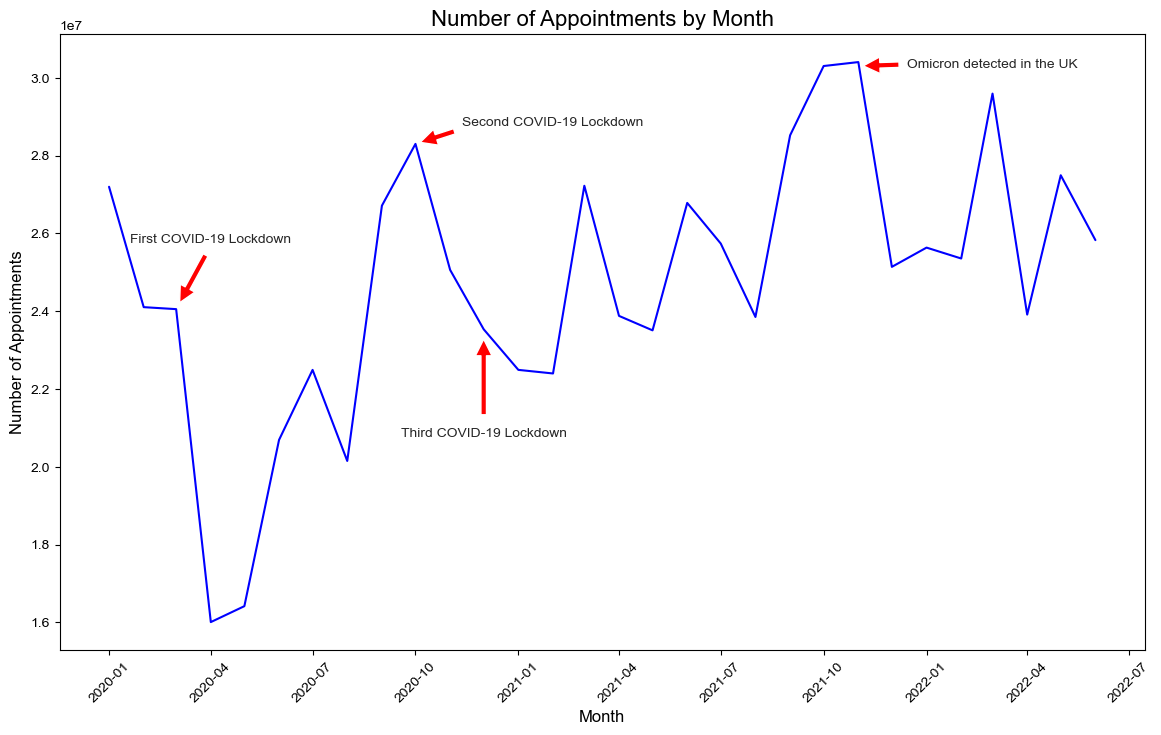

In [12]:
# Create a new DataFrame to show total appointments by month. 
# Use the ar DataFrame to show a longer time period. 

# Use groupby() to group appointment count by appointment month. 
ar_month = ar.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# Change the format of 'appointment_month'.
ar_month['appointment_month'] = pd.to_datetime(ar_month['appointment_month'])

# Set the size and style of the plot
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn. 
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_month, 
             color='blue', ci=None, ax=ax)

# Set the labels and title of the plot.
# Rotate the x-axis tick labels. 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.title('Number of Appointments by Month', fontsize=16)
plt.xticks(rotation=45)


# Add annotations to the plot to explain the trends. 
ax.annotate("First COVID-19 Lockdown", xy=(pd.to_datetime('2020-03'), 24053468),
            xytext=(pd.to_datetime('2020-04'), 26000000),
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

ax.annotate("Second COVID-19 Lockdown", xy=(pd.to_datetime('2020-10'), 28301932),
            xytext=(pd.to_datetime('2021-02'), 29000000),
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

ax.annotate("Third COVID-19 Lockdown", xy=(pd.to_datetime('2020-12'), 23535936),
            xytext=(pd.to_datetime('2020-12'), 21000000),
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

ax.annotate("Omicron detected in the UK", xy=(pd.to_datetime('2021-11'), 30303834),
            xytext=(pd.to_datetime('2022-03'), 30500000),
            arrowprops={'facecolor': 'red', 'shrink': 0.1},
            horizontalalignment='center', verticalalignment='top')

# Show the plot
plt.show()

# Save the plot.
fig.savefig('Appts by Month')

### Explore ICB locations. 

In [13]:
# Determine the number of Integrated Care Boards using value.counts(). 
print(ar['icb_ons_code'].nunique())

42


In [14]:
# Create a user defined function to calculate appointment number and percentage.
# Percentages rounded up to one decimal place. 
# This function will be called repeatedly. 

def calc_percent(df):
    total_count = df['count_of_appointments'].sum()
    df['Percent'] = (df['count_of_appointments'] / total_count * 100).round(1)
    return df

In [15]:
# Determine the numner and percentage of appointments by Integrated Care Board. 

# Use groupby() to group appointment count by icb_ons_code. 
icb_ons = ar.groupby('icb_ons_code')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
icb_ons = calc_percent(icb_ons)

# View the top 10 rows of the DataFrame. 
icb_ons.head(10)

,icb_ons_code,count_of_appointments,Percent
0,E54000050,43083535,5.8
1,E54000054,36090387,4.9
2,E54000057,34080583,4.6
3,E54000008,33099882,4.5
4,E54000027,29380767,4.0
5,E54000029,23594259,3.2
6,E54000051,22983699,3.1
7,E54000042,22968277,3.1
8,E54000032,22623978,3.0
9,E54000053,22568571,3.0


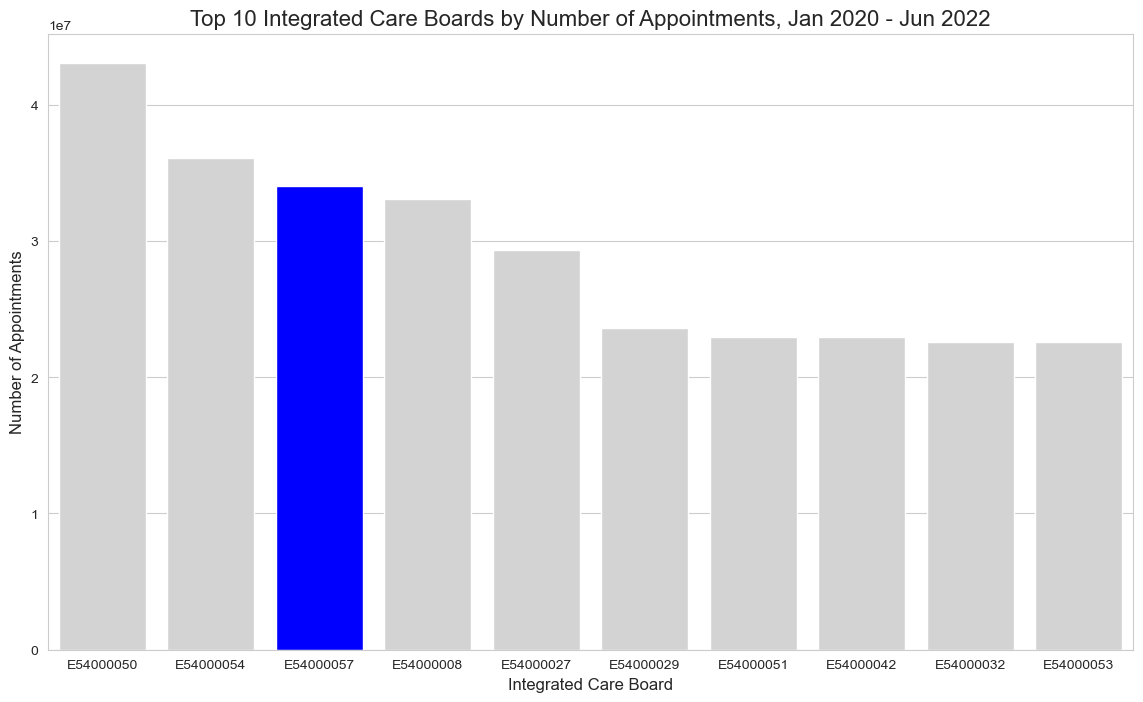

In [16]:
# Plot the top 10 Integrated Care Boards by by percentage of total appointments. 

# Filter the icb_ons Dataframe just show the top 10 results. 
top10_icb = icb_ons.sort_values(by='count_of_appointments', ascending=False).head(10)

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
icb_bar = sns.barplot(x='icb_ons_code', y='count_of_appointments', data=top10_icb, color='lightgrey')

# Set the labels and title of the plot.
plt.xlabel('Integrated Care Board', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.title('Top 10 Integrated Care Boards by Number of Appointments, Jan 2020 - Jun 2022', fontsize=16)

# Get the patches of the bars in the plot. 
# Set the bar that represents NWL London ICB (E54000027) as blue.
bars = icb_bar.patches
bars[2].set_facecolor('blue')

# Save the plot.
fig.savefig('top 10 ICB')

### Explore Service Settings in the nc Dataframe. 

In [17]:
# Determine the numner and percentage of appointments by service setting. 

# Use groupby() to group appointment count by service setting.  
ss_appt = nc.groupby('service_setting')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ss_appt = calc_percent(ss_appt)

# View the DataFrame. 
ss_appt.head()

,service_setting,count_of_appointments,Percent
0,General Practice,270811691,91.5
1,Unmapped,11080810,3.7
2,Primary Care Network,6557386,2.2
3,Other,5420076,1.8
4,Extended Access Provision,2176807,0.7


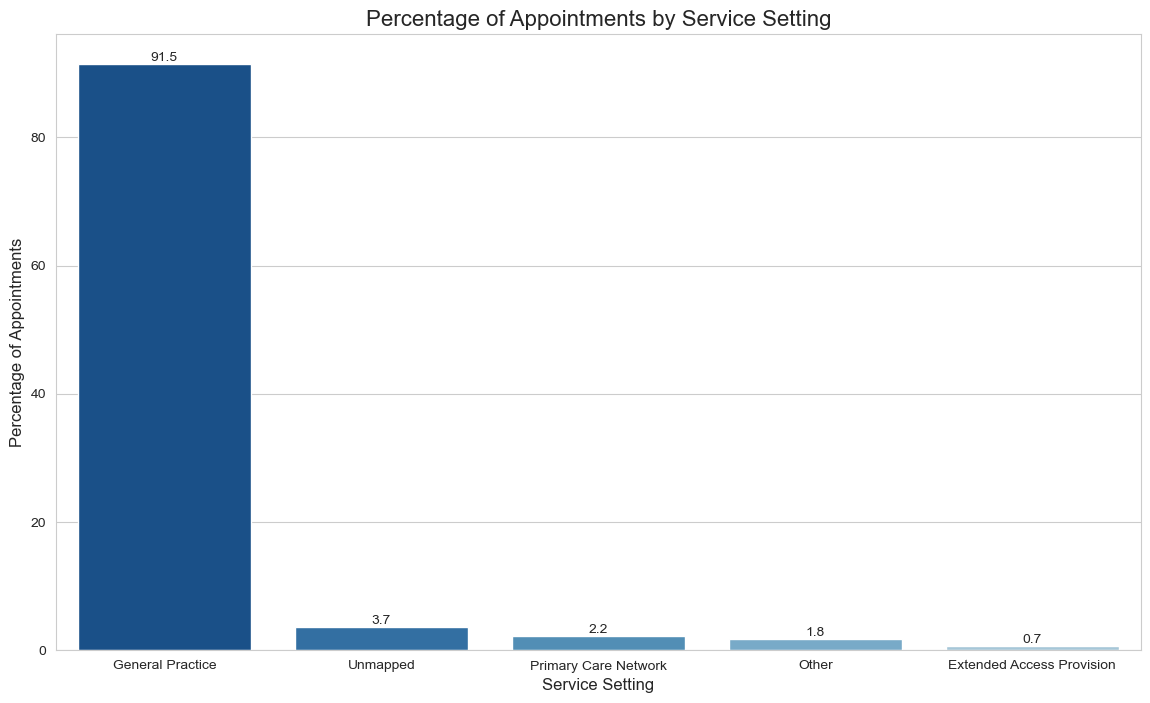

In [18]:
# Plot perentage of appointments by service setting. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Reverse order of Blues palette. 
reversed_blues = sns.color_palette('Blues', n_colors=7)[::-1]

# Create a barplot using Seaborn. 
sns.barplot(x='service_setting', y='Percent', data=ss_appt, palette=reversed_blues, 
            order=ss_appt['service_setting'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('Service Setting',fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by Service Setting', fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Service setting')

### Explore Context Types in the nc DataFrame.

In [19]:
# Determine the numner and percentage of appointments by context type.

# Use groupby() to group appointment count by context type. 
ct_appt = nc.groupby('context_type')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ct_appt = calc_percent(ct_appt)

# View the DataFrame. 
ct_appt

,context_type,count_of_appointments,Percent
0,Care Related Encounter,257075158,86.8
1,Inconsistent Mapping,27890802,9.4
2,Unmapped,11080810,3.7


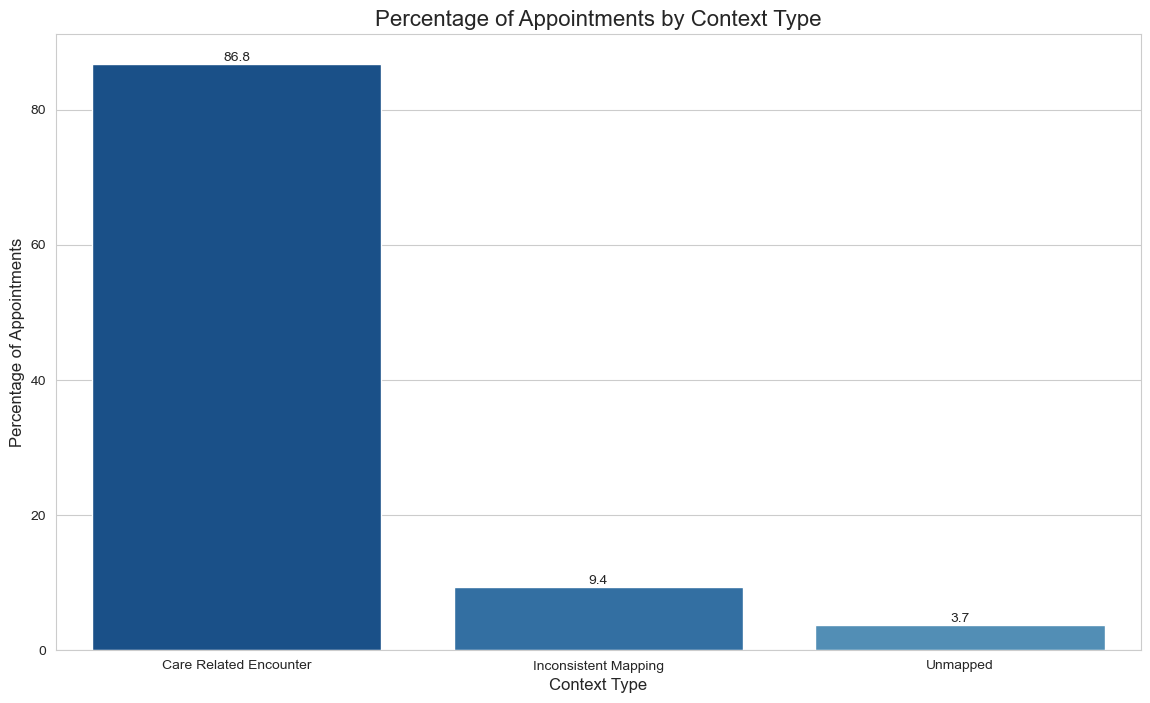

In [20]:
# Plot perentage of appointments by context type. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='context_type', y='Percent', data=ct_appt, palette=reversed_blues, 
            order=ct_appt['context_type'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('Context Type',fontsize=12)
plt.ylabel('Percentage of Appointments',fontsize=12)
plt.title('Percentage of Appointments by Context Type',fontsize=16)
plt.show()

### Explore National Categories in the nc DataFrame. 

In [21]:
# Determine the numner and percentage of appointments by national category.  

# Use groupby() to group appointment count by national category.  
nc_appt = nc.groupby('national_category')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
nc_appt = calc_percent(nc_appt)

# View the DataFrame. 
nc_appt.head()

,national_category,count_of_appointments,Percent
0,General Consultation Routine,97271522,32.9
1,General Consultation Acute,53691150,18.1
2,Clinical Triage,41546964,14.0
3,Planned Clinics,28019748,9.5
4,Inconsistent Mapping,27890802,9.4


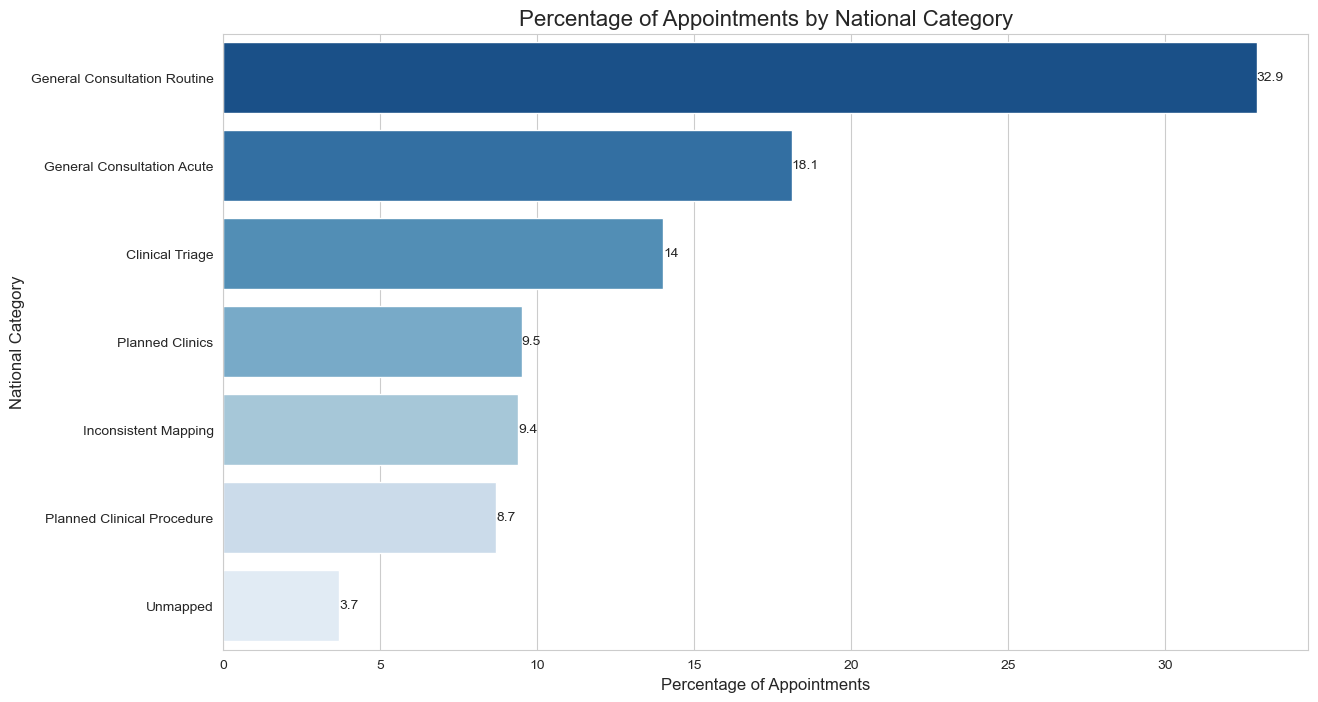

In [22]:
# Plot perentage of appointments by national category. 

# Filter the nc_appt Dataframe just show the top results. 
top10_nc = nc_appt.sort_values(by='Percent', ascending=False).head(7)

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='Percent', y='national_category', data=top10_nc, orient='h', 
            palette=reversed_blues, order=top10_nc['national_category'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.ylabel('National Category',fontsize=12)
plt.xlabel('Percentage of Appointments',fontsize=12)
plt.title('Percentage of Appointments by National Category',fontsize=16)
plt.show()

### Explore Appointment Status in the ar DataFrame. 

In [23]:
# Determine the numner and percentage of appointments by status.  

# Use groupby() to group appointment count by status. 
as_appt = ar.groupby('appointment_status')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
as_appt = calc_percent(as_appt)

# View the DataFrame. 
as_appt

,appointment_status,count_of_appointments,Percent
0,Attended,677755876,91.2
1,Unknown,34137416,4.6
2,DNA,30911233,4.2


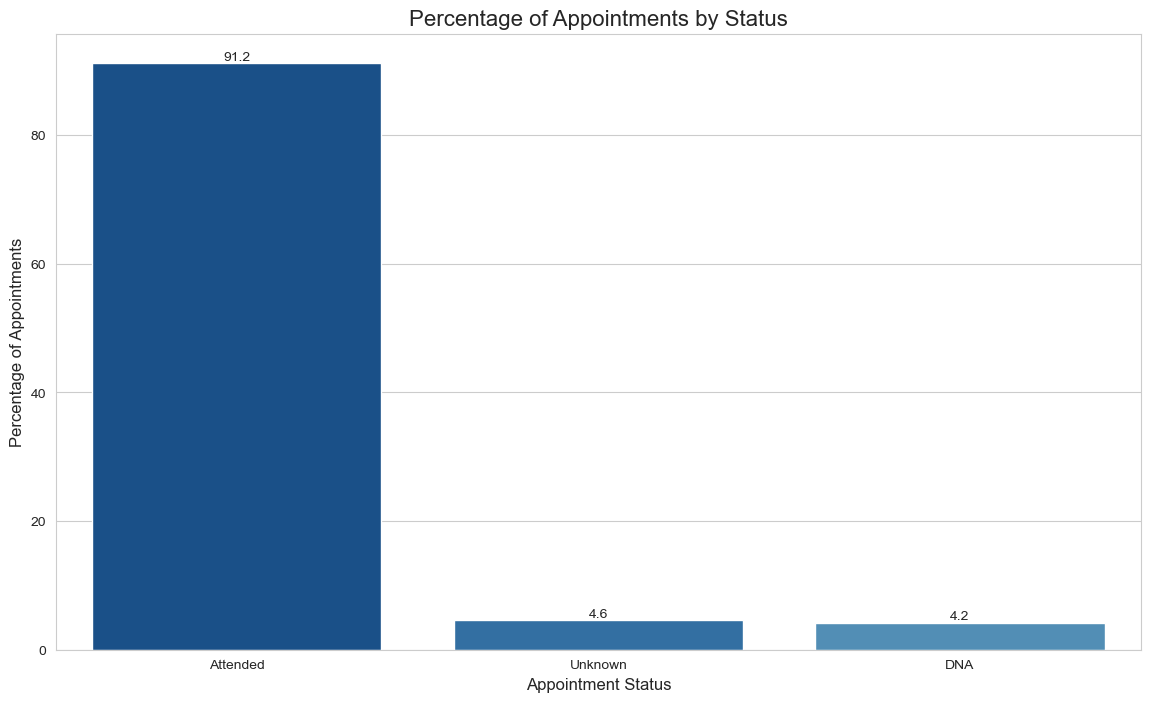

In [24]:
# Plot perentage of appointments by status. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='appointment_status', y='Percent', data=as_appt, palette=reversed_blues, 
            order=as_appt['appointment_status'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('Appointment Status',fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by Status', fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Appointment Status')

### Explore HCP Type in the ar DataFrame. 

In [25]:
# Determine the numner and percentage of appointments by HCP type.  

# Use groupby() to group appointment count by HCP type. 
ht_appt = ar.groupby('hcp_type')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ht_appt = calc_percent(ht_appt)

# View the DataFrame. 
ht_appt

,hcp_type,count_of_appointments,Percent
0,GP,379650140,51.1
1,Other Practice staff,339650535,45.7
2,Unknown,23503850,3.2


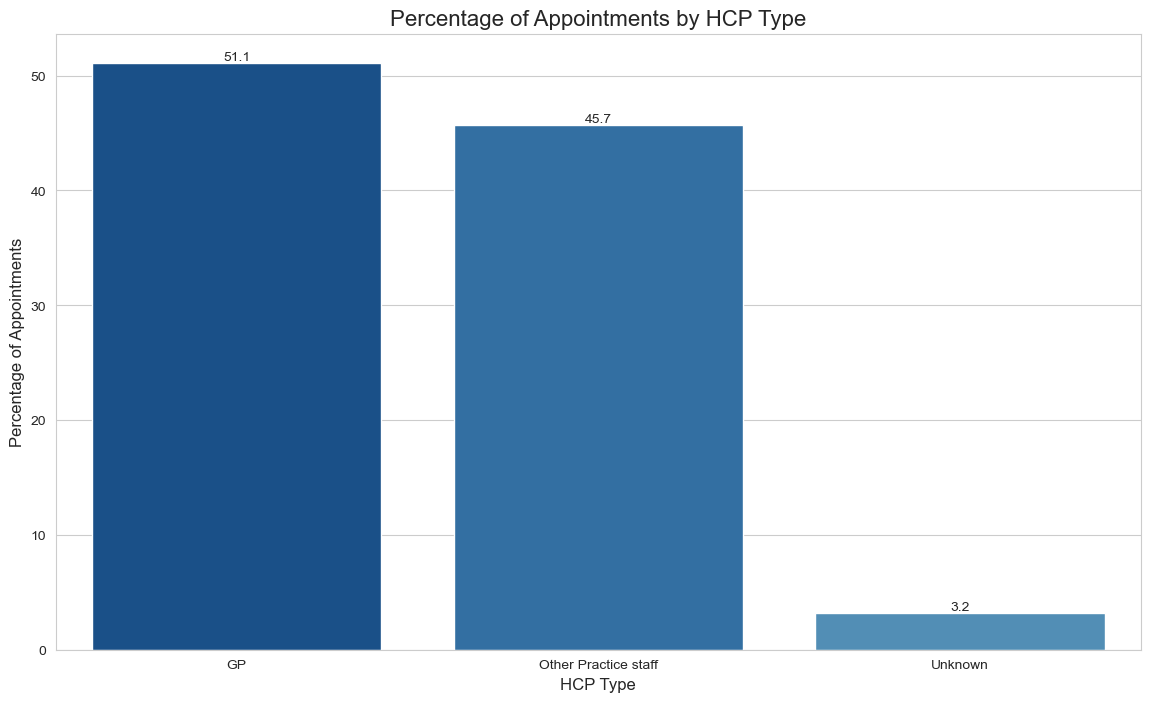

In [26]:
# Plot perentage of appointments by HCP type. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='hcp_type', y='Percent', data=ht_appt, 
            palette=reversed_blues, order=ht_appt['hcp_type'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('HCP Type', fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by HCP Type',fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Appointments by HCP Type')

### Explore Appointment Mode in the ar DataFrame. 

In [27]:
# Determine the numner and percentage of appointments by mode. 

# Use groupby() to group appointment count by mode.
md_appt = ar.groupby('appointment_mode')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
md_appt = calc_percent(md_appt)

# View the DataFrame. 
md_appt

,appointment_mode,count_of_appointments,Percent
0,Face-to-Face,439981729,59.2
1,Telephone,267862657,36.1
2,Unknown,26451305,3.6
3,Home Visit,4887876,0.7
4,Video/Online,3620958,0.5


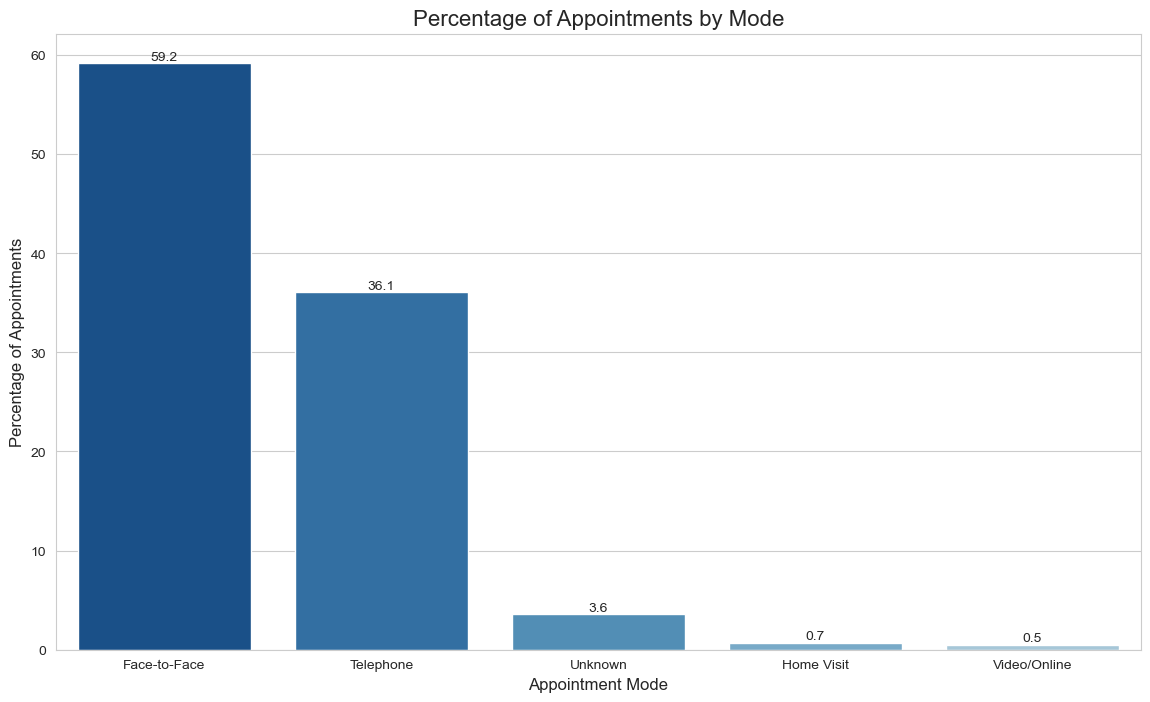

In [28]:
# Plot perentage of appointments by mode. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='appointment_mode', y='Percent', data=md_appt, 
            palette=reversed_blues, order=md_appt['appointment_mode'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('Appointment Mode', fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by Mode',fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Percentage of Appointments by Mode')

### Explore Time Between Book and Appointment in the ar DataFrame. 

In [29]:
# Determine the numner and percentage of appointments by time between booking.

# Use groupby() to group appointment count by time between booking. 
tba_appt = ar.groupby('time_between_book_and_appointment')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
tba_appt = calc_percent(tba_appt)

# View the DataFrame. 
tba_appt

,time_between_book_and_appointment,count_of_appointments,Percent
0,Same Day,342747171,46.1
1,2 to 7 Days,153794531,20.7
2,8 to 14 Days,86846519,11.7
3,1 Day,67716097,9.1
4,15 to 21 Days,42710574,5.7
5,22 to 28 Days,25536541,3.4
6,More than 28 Days,23050987,3.1
7,Unknown / Data Quality,402105,0.1


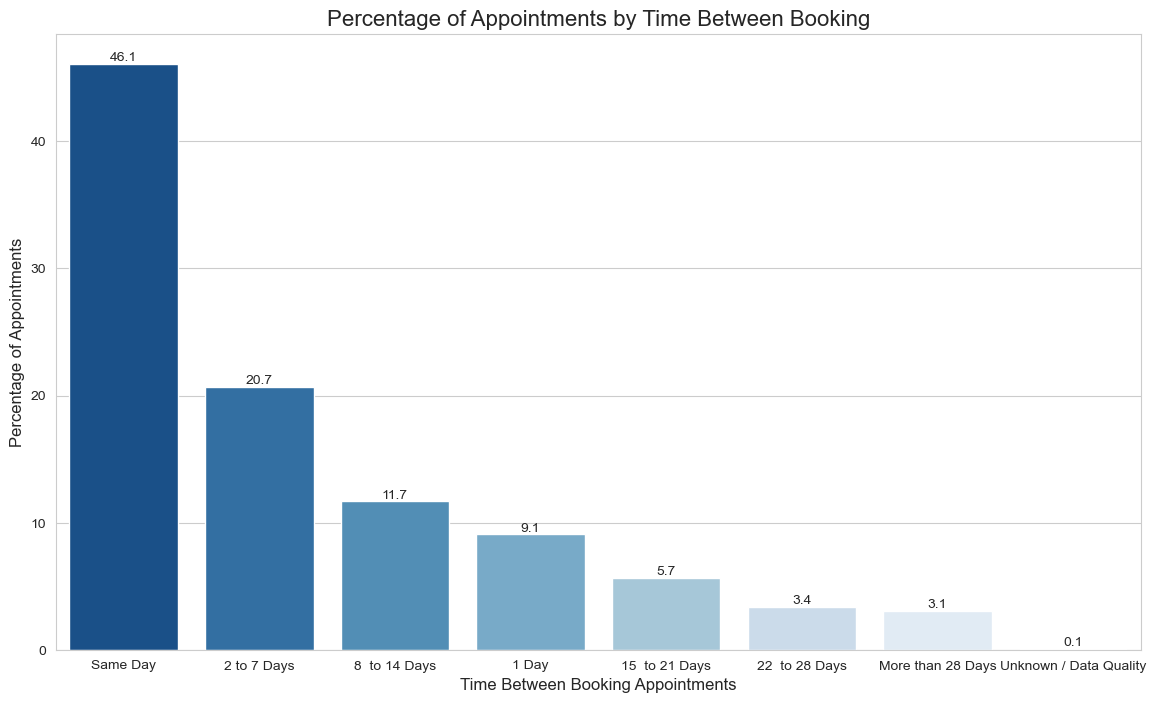

In [30]:
# Plot perentage of appointments by time between booking. 

# Set the size and style of the plot. 

fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='time_between_book_and_appointment', y='Percent', 
            data=tba_appt, palette=reversed_blues, order=tba_appt['time_between_book_and_appointment'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the labels and title of the plot.
plt.xlabel('Time Between Booking Appointments', fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by Time Between Booking', fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Appointments by Time Between Booking')

### Explore Appointment Duration in the ad DataFrame. 

In [31]:
# Determine the numner and percentage of appointments by duration.

# Use groupby() to group appointment count by duration.  
ad_appt = ad.groupby('actual_duration')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ad_appt = calc_percent(ad_appt)

# View the DataFrame. 
ad_appt

,actual_duration,count_of_appointments,Percent
0,Unknown / Data Quality,40284086,24.0
1,6-10 Minutes,33800815,20.1
2,1-5 Minutes,28600865,17.0
3,11-15 Minutes,25160882,15.0
4,16-20 Minutes,16004247,9.5
5,21-30 Minutes,15026365,8.9
6,31-60 Minutes,9103432,5.4


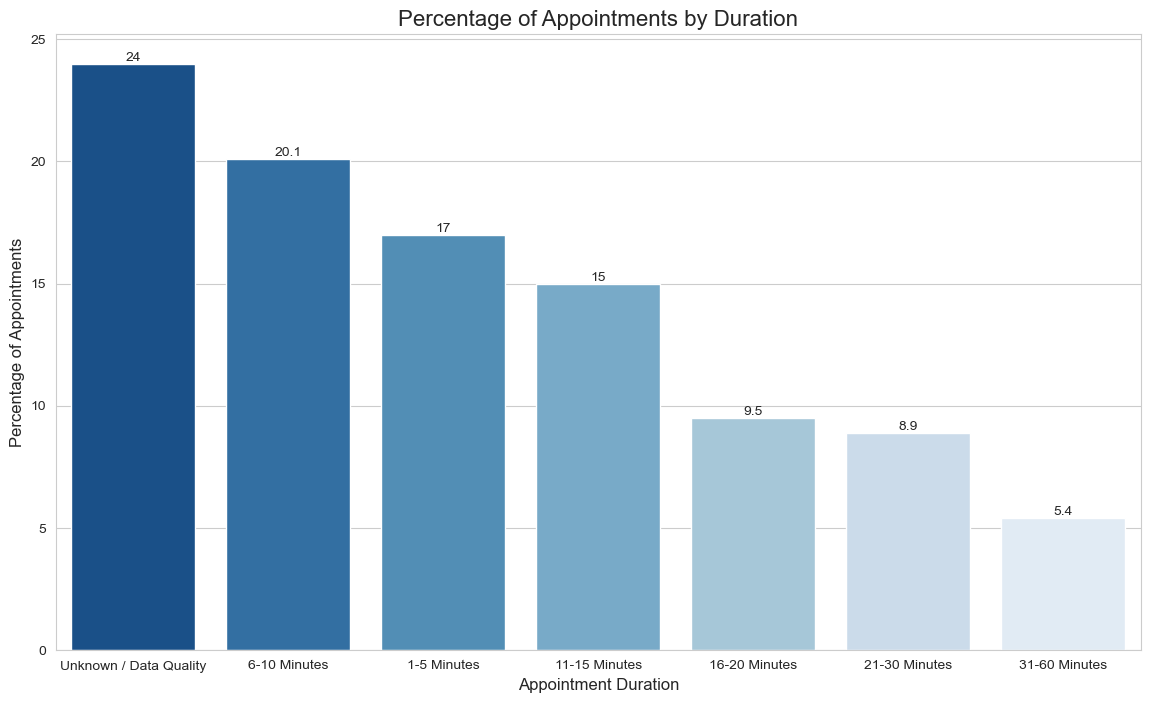

In [32]:
# Plot percentage of appointments by actual duration. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a barplot using Seaborn. 
sns.barplot(x='actual_duration', y='Percent', data=ad_appt, 
            palette=reversed_blues, order=ad_appt['actual_duration'])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Set the labels and title of the plot.
plt.xlabel('Appointment Duration', fontsize=12)
plt.ylabel('Percentage of Appointments', fontsize=12)
plt.title('Percentage of Appointments by Duration', fontsize=16)
plt.show()

# Save the plot.
fig.savefig('Appointments by Duration')

### Identification of Outliers 

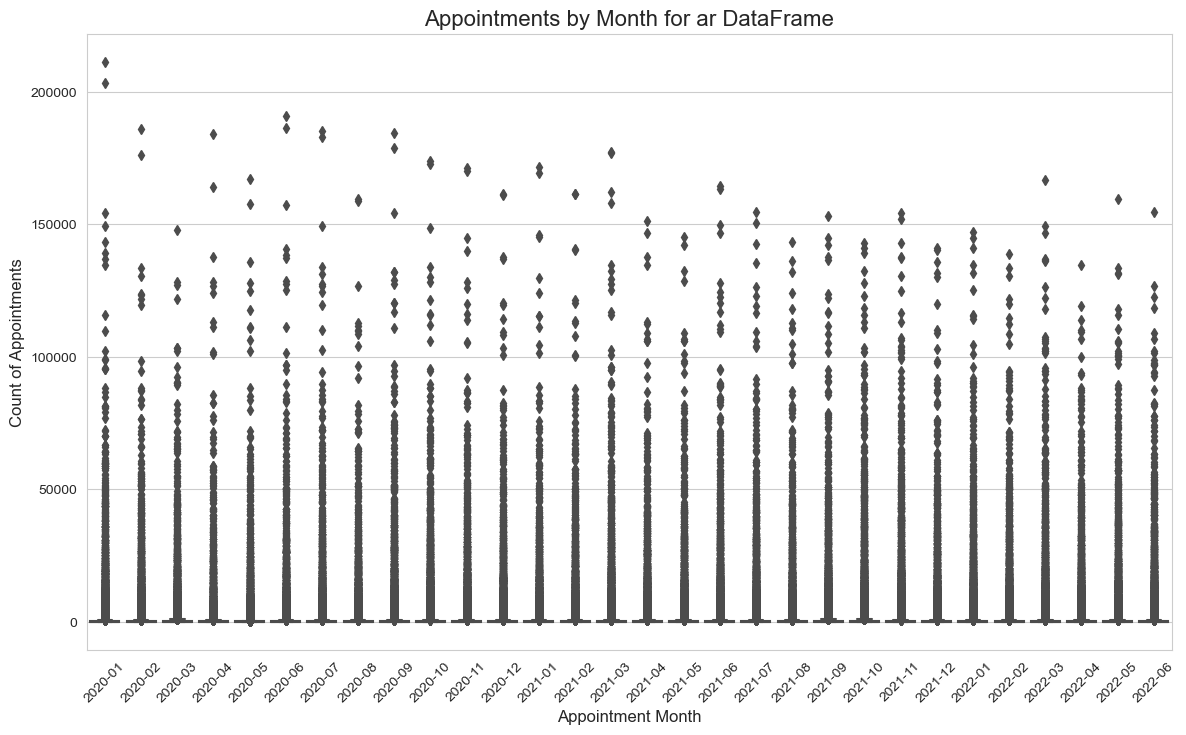

In [33]:
# Identify outliers in the ar DataFrame using a boxplot.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn. 
sns.boxplot(x='appointment_month', y='count_of_appointments', color='blue', data=ar)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for ar DataFrame', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Save the plot.
fig.savefig('ar outliers')

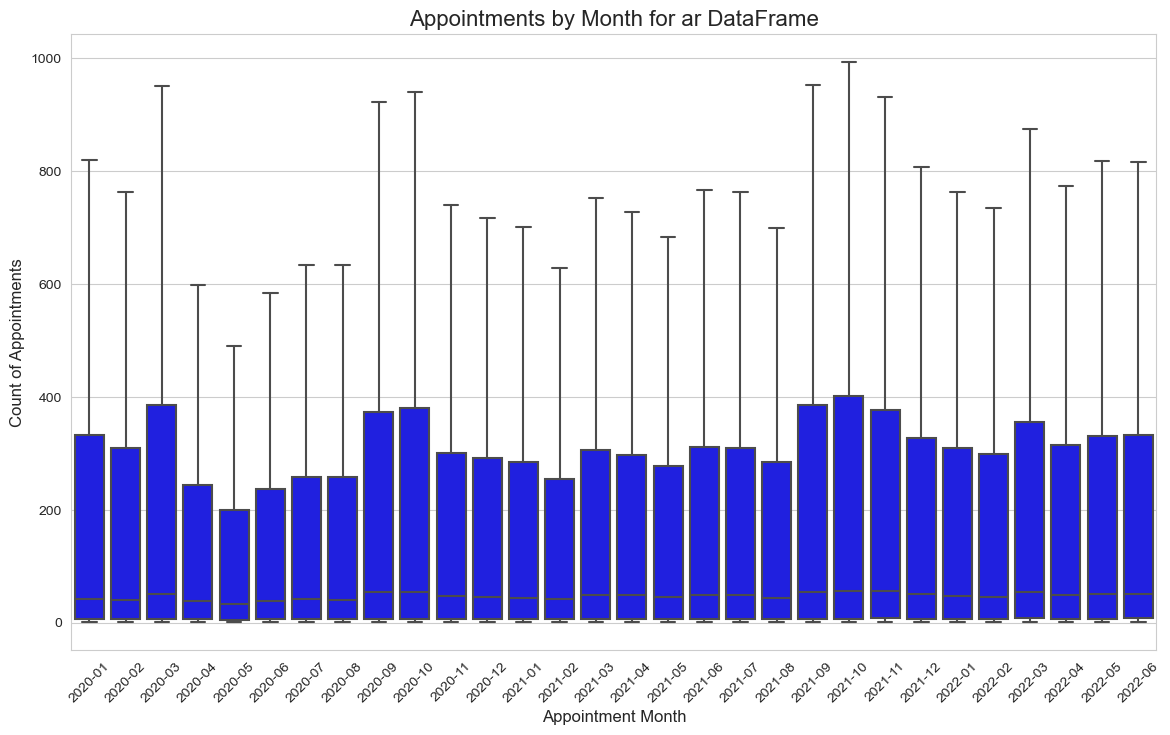

In [34]:
# Remove outliers from the ar DataFrame. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use showfliers argument to remove outliers. 
sns.boxplot(x='appointment_month', y='count_of_appointments', data=ar, color='blue', showfliers=False)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for ar DataFrame', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Save the plot.
fig.savefig('ar no outliers')

# Output shows that removal of outliers decreases the size of the dataset significantly.
# Outliers will not be removed for the ar Dataframe. 

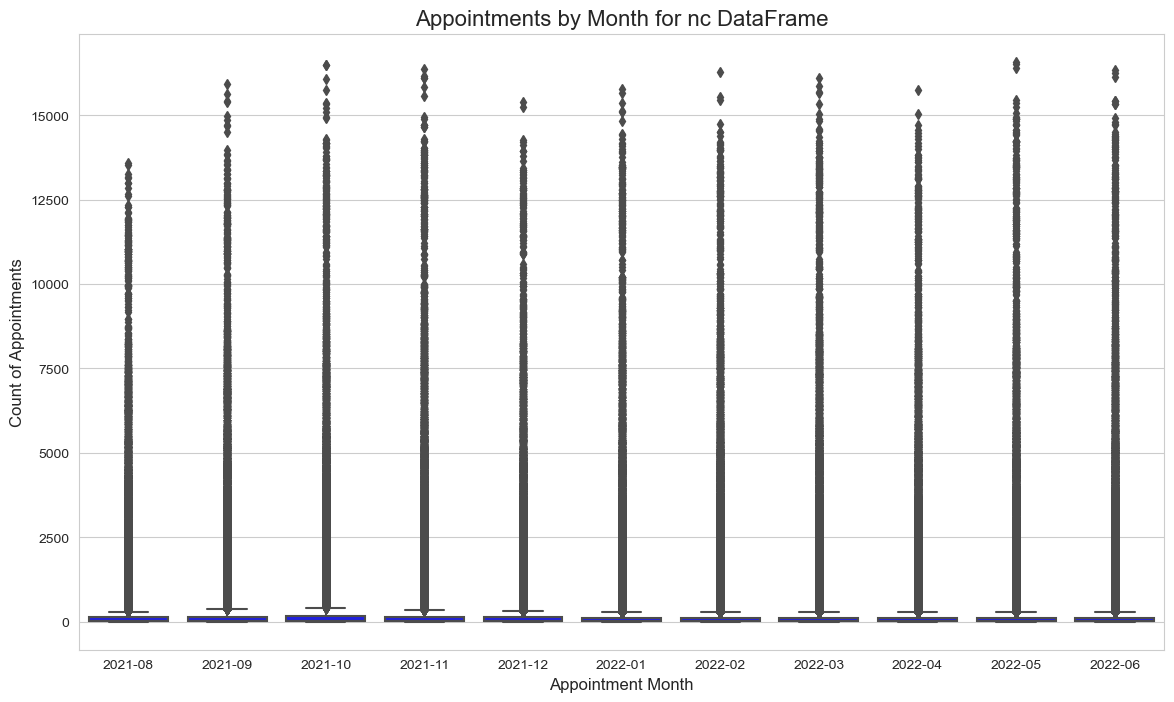

In [35]:
# Identify outliers in the nc DataFrame using a boxplot.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
sns.boxplot(x='appointment_month', y='count_of_appointments', color='blue', data=nc)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for nc DataFrame', fontsize=16)
plt.show()

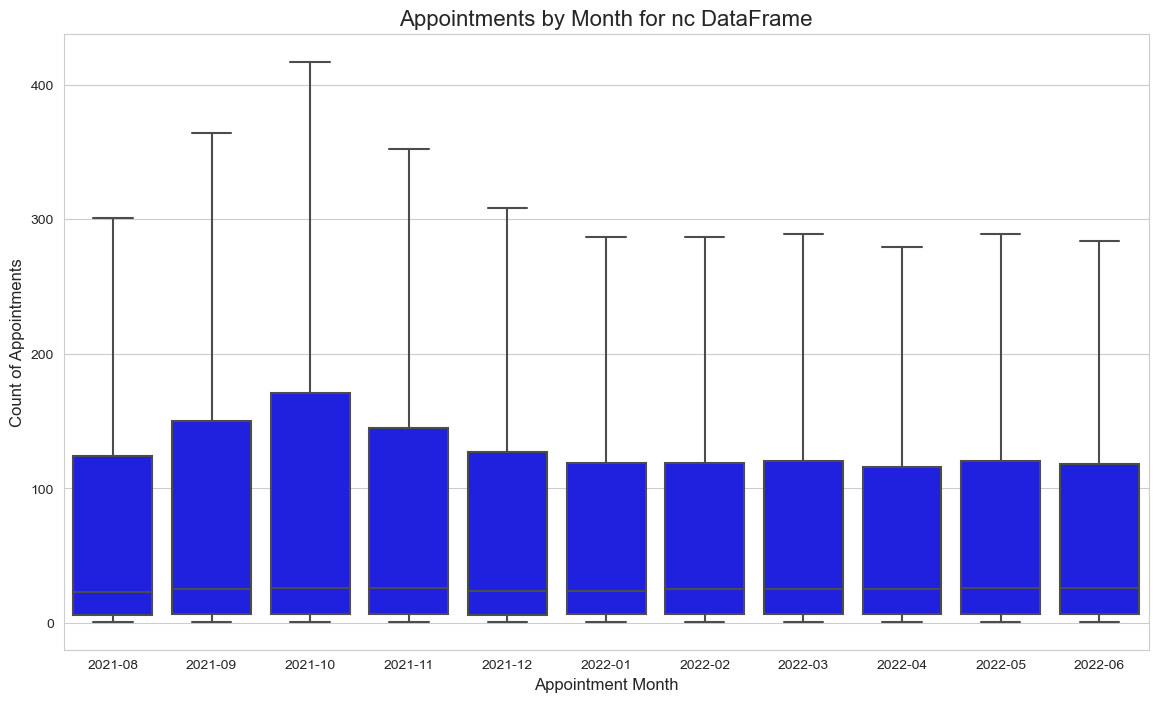

In [36]:
# Remove outliers from the ar DataFrame. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use showfliers argument to remove outliers. 
sns.boxplot(x='appointment_month', y='count_of_appointments', data=nc, color='blue', showfliers=False)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for nc DataFrame', fontsize=16)
plt.show()

# Output shows that removal of outliers decreases the size of the dataset significantly.
# Outliers will not be removed for the ar Dataframe.

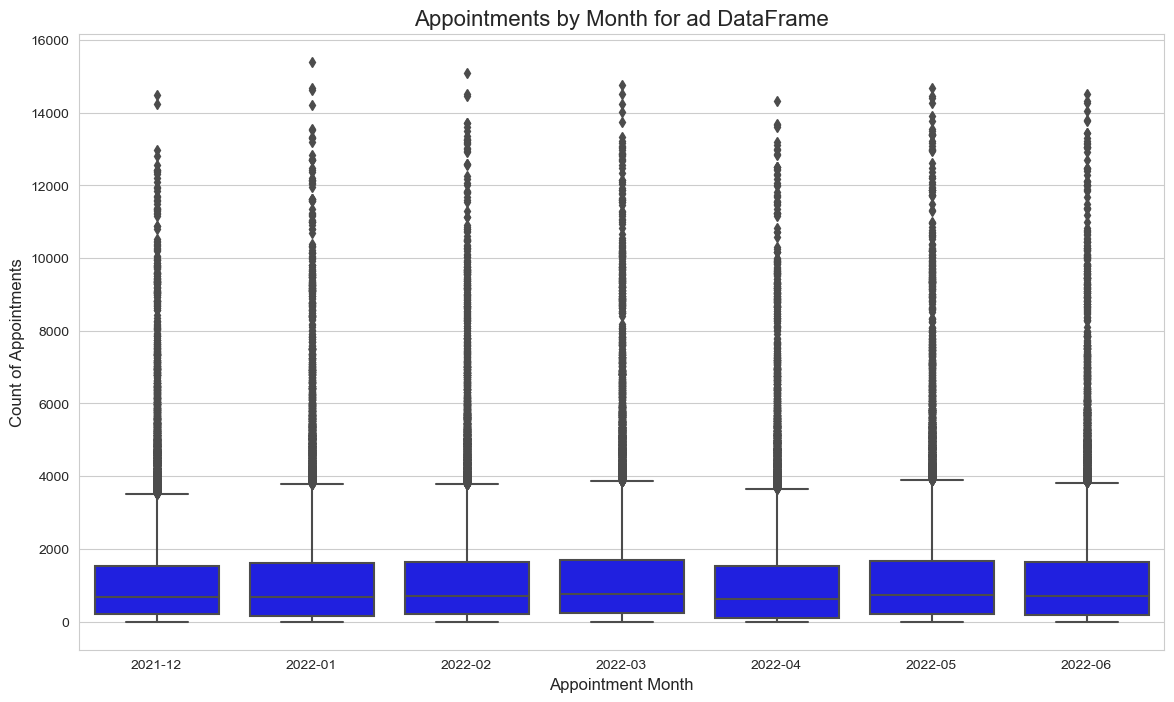

In [37]:
# Identify outliers in the ad DataFrame using a boxplot.

# Change appointment_date to appointment_month for easier visualisation. 
# Use strftime method to change date into string YYYY-MM format.  
ad['appointment_month'] = ad['appointment_date'].dt.strftime('%Y-%m')

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
sns.boxplot(x='appointment_month', y='count_of_appointments', color='blue', data=ad)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for ad DataFrame', fontsize=16)
plt.show()

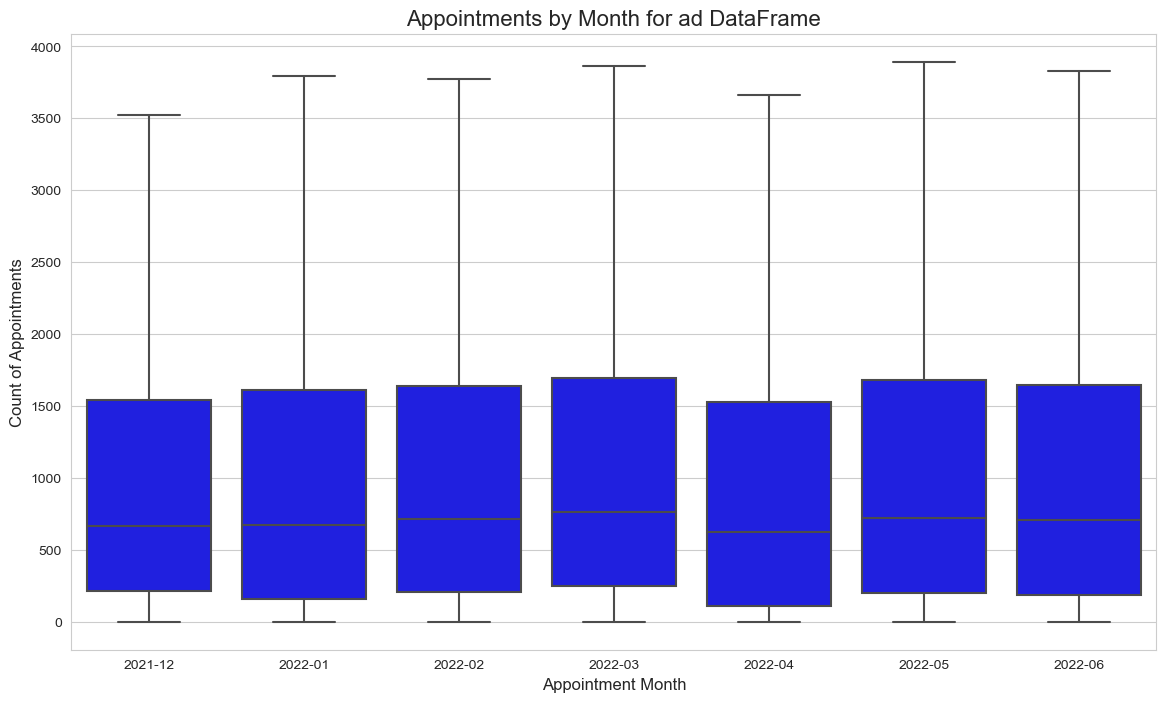

In [38]:
# Remove outliers from the ad DataFrame. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use showfliers argument to remove outliers.
sns.boxplot(x='appointment_month', y='count_of_appointments', data=ad, color='blue', showfliers=False)

# Set the labels and title of the plot.
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Count of Appointments', fontsize=12)
plt.title('Appointments by Month for ad DataFrame', fontsize=16)
plt.show()

# Output shows that removal of outliers decreases the size of the dataset significantly.
# Outliers will not be removed for the ad Dataframe.

### Removal of data anomalies

In [39]:
# Data classed as Unmapped or Inconsistent Mapping removed from the nc DataFrame. 
# Use drop() method.

nc_clean = nc.drop(nc[(nc['service_setting'] == 'Unmapped') | (nc['context_type'] == 'Unmapped') 
                       | (nc['context_type'] == 'Inconsistent Mapping') 
                       | (nc['national_category'] == 'Unmapped')].index)

# View the shape of the original and cleaned nc DataFrame. 
print(nc_clean.shape)
print(nc.shape)
nc_clean.head()

(700481, 8)
(817394, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [40]:
# Data classed as Unknown / Data Quality removed from the ad DataFrame. 
# Use drop() method.

ad_clean = ad.drop(ad[ad['actual_duration'] == 'Unknown / Data Quality'].index)

# View the shape of the original and cleaned ad DataFrame. 
print(ad_clean.shape)
print(ad.shape)
ad_clean.head()

(117632, 6)
(137793, 6)


,sub_icb_location_name,icb_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
0,NHS North East and North Cumbria ICB - 00L,E54000050,2021-12-01,31-60 Minutes,364,2021-12
1,NHS North East and North Cumbria ICB - 00L,E54000050,2021-12-01,21-30 Minutes,619,2021-12
2,NHS North East and North Cumbria ICB - 00L,E54000050,2021-12-01,6-10 Minutes,1698,2021-12
4,NHS North East and North Cumbria ICB - 00L,E54000050,2021-12-01,16-20 Minutes,730,2021-12
5,NHS North East and North Cumbria ICB - 00L,E54000050,2021-12-01,11-15 Minutes,1073,2021-12


In [41]:
# Data classed as Unkown or Unknown / Data Quality removed from the ar DataFrame. 
# Use drop() method.

ar_clean = ar.drop(ar[(ar['appointment_status'] == 'Unknown') | (ar['hcp_type'] == 'Unknown') 
                       | (ar['appointment_mode'] == 'Unknown') | 
                      (ar['time_between_book_and_appointment'] == 'Unknown / Data Quality')].index)

# View the shape of the original and cleaned ar DataFrame. 
print(ar_clean.shape)
print(ar.shape)
ar_clean.head()

(270972, 7)
(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


### Social Media analysis 

In [42]:
# Load the tweets data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head(5)
print(tweets.columns)

# This dataset contains no date column or information about a timeframe.

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


In [43]:
# Explore the data set.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [44]:
# Create a new DataFrame containing only text values. 
tweet_text = tweets.select_dtypes("object")

# View the DataFrame.
tweet_text.head(5)

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_lang
0,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",en
1,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",en
2,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",en
4,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",en


In [45]:
# Use a for loop to cycle through the tweet_full_text column. 
# Creatw a list of values (tags) containing the # symbol e.g. hashtags. 

tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            # Append the results into the tags list. 

# Create a Pandas Series with the resulting list. 
tags_series = pd.Series(tags)

# Count the values in the series.
tags_counts = tags_series.value_counts()

# Display the first 30 records.
print(tags_counts[:30])

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [46]:
# Convert the Series to a DataFrame using to_frame() and reset_index(). 
hashtags = tags_counts.to_frame().reset_index()

# Rename the columns.
hashtags.columns = ['word', 'count']

# Change the count data type to an integer. 
hashtags['count'] = hashtags['count'].astype(int)

# View the result.
print(hashtags.head())
print(hashtags.info())
hashtags

          word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 20.7+ KB
None


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


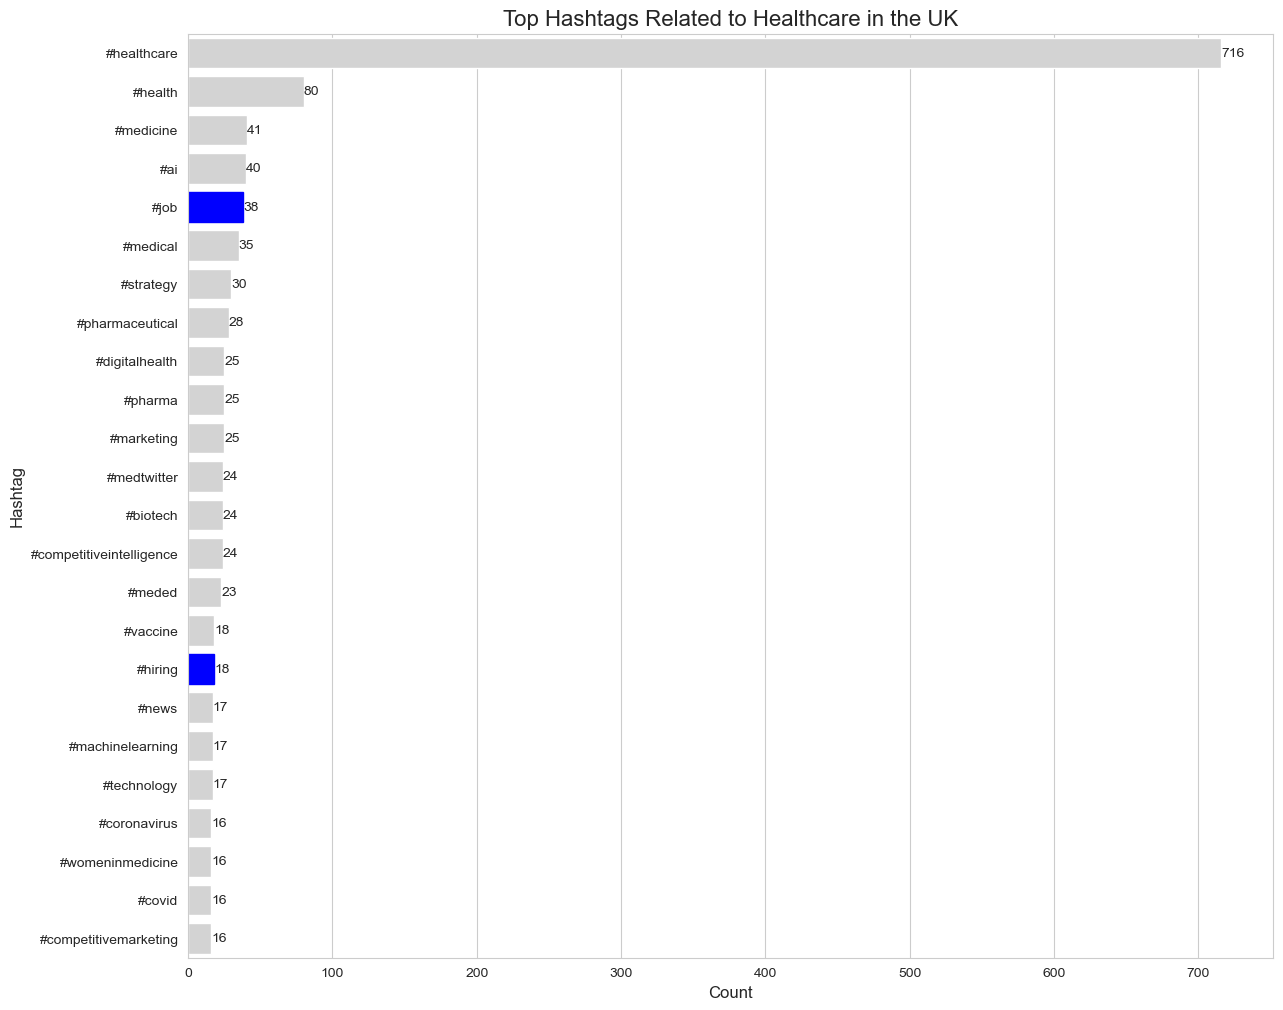

In [47]:
# Create a Seaborn barplot indicating records with a count >10 records.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Change the orientation to horizontal. 
sns.barplot(x='count', y='word', orient='h', color='lightgrey', 
            data=hashtags[hashtags['count'] > 15])

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Change the bar colours of #job and #hiring to blue. 
for i in [4, 16]:
    ax.get_children()[i].set_color('blue')
    
# Set the labels and title of the plot.
plt.xlabel('Count', fontsize=12)
plt.ylabel('Hashtag', fontsize=12)
plt.title('Top Hashtags Related to Healthcare in the UK', fontsize=16)
          
# Save the plot.
fig.savefig('Hashtags')

# Hard to derive insights from this data. 
# But there are a high number of posts related to jobs and hiring.
# Could be indicative of staff shortages in healthcare in general. 

In [48]:
# Search the 'tweet_full_text' column for tweets containing job. 
job_text = tweets[tweets['tweet_full_text'].str.contains('job', case=False)]

# Display the search result
print(job_text.shape)
job_text

# This could indicate that there are staff shortages in healthcare systems in general.
# Twitter is being used for recruitment. 

(100, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
12,1567582294424035329,Work-life balance is at the foundation of how ...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring, #Healthcare, #quality...","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
21,1567581829737361409,"If you're looking for work in #Chicago, IL, ch...","{'hashtags': [{'text': 'Chicago', 'indices': [...","#Chicago, #Healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
23,1567581730546089985,RT @KimcoStaffing: Apply now to work for #Medi...,"{'hashtags': [{'text': 'MediQuestStaffing', 'i...","#MediQuestStaffing, #Hospital, #shift, #Newpor...","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
24,1567581708320481282,Apply now to work for #MediQuestStaffing as EV...,"{'hashtags': [{'text': 'MediQuestStaffing', 'i...","#MediQuestStaffing, #Hospital, #shift, #Newpor...","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
33,1567581004084445185,"See our latest #Albuquerque, NM #Healthcare jo...","{'hashtags': [{'text': 'Albuquerque', 'indices...","#Albuquerque, #Healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1085,1567588561947430915,Job Opportunity! We're in need of a FT Patient...,"{'hashtags': [{'text': 'CRMC', 'indices': [170...","#CRMC, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1106,1567586941805432832,"We are very appreciative, very proud of the ef...","{'hashtags': [{'text': 'sisucare', 'indices': ...","#sisucare, #cna, #cnatraining, #onlinecnatrain...","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1150,1567584355182325760,Did you know Vermont is regularly ranked among...,"{'hashtags': [{'text': 'Waterbury', 'indices':...","#Waterbury, #Healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1152,1567584226723364864,"See our latest White Bear Lake, MN Nursing Ass...","{'hashtags': [{'text': 'Healthcare', 'indices'...","#Healthcare, #CNAJob","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [49]:
# Search the 'tweet_full_text' column for tweets containing NHS. 
nhs_text = tweets[tweets['tweet_full_text'].str.contains('NHS', case=False)]

# Display the output. 
print(nhs_text.shape)
nhs_text

# There were just three tweets related to the NHS. 
# None of these tweets were related to missed appointments.

(3, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
200,1567654557768982529,RT @LaunchpadDevon: @RDCareersNHS Recruitment...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
231,1567652040192532480,RT @SkillsLaunchpad: Recruitment Event Exeter...,"{'hashtags': [{'text': 'administration', 'indi...",#administration,"{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
450,1567633960879984640,HLA Scholar Thessa Rebecca Frieble from our Am...,"{'hashtags': [{'text': 'HLAScholars', 'indices...","#HLAScholars, #Leadership, #HLA, #Healthcare, ...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [50]:
# Search the 'tweet_full_text' column for tweets containing appointment. 
appt_text = tweets[tweets['tweet_full_text'].str.contains('appointment', case=False)]

# Display the search result
print(appt_text.shape)
appt_text

# There were eight tweets related to appointments. 
# None of these tweets were related to missed appointments.

(8, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
47,1567580499421569025,RT @_timos_: Purespring Therapeutics strengthe...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
59,1567580395142803459,Purespring Therapeutics strengthens scientific...,"{'hashtags': [{'text': 'strategy', 'indices': ...","#strategy, #competitiveintelligence, #marketin...","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
339,1567643379894292481,Hiring Alert: Patient Service Representative (...,"{'hashtags': [{'text': 'Canton', 'indices': [4...","#Canton, #job, #SchedulingAppointments, #Treat...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
346,1567642874715455491,New Opportunity: Patient Service Representativ...,"{'hashtags': [{'text': 'Dearborn', 'indices': ...","#Dearborn, #job, #SchedulingAppointments, #Tre...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
351,1567642370224623616,New Opportunity: Patient Service Representativ...,"{'hashtags': [{'text': 'Warren', 'indices': [4...","#Warren, #job, #SchedulingAppointments, #Treat...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
360,1567641873879121921,Hot Job: Patient Service Representative (#East...,"{'hashtags': [{'text': 'EastLansing', 'indices...","#EastLansing, #job, #SchedulingAppointments, #...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
701,1567615451731050497,Period dignity officer role scrapped after abu...,"{'hashtags': [{'text': 'health', 'indices': [7...","#health, #mentalhealth, #healthcare, #wellness...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1085,1567588561947430915,Job Opportunity! We're in need of a FT Patient...,"{'hashtags': [{'text': 'CRMC', 'indices': [170...","#CRMC, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


## 3. Explore NWL London ICB Data between Dec 2021 - June 2022. 

### Create subsets of each Dataframe.

In [51]:
# Create a subset of the nc dataset.
# Filter by icb_ons_code E54000027 and appointment_date > 2021-11-30. 
nc_nwl = nc_clean[(nc_clean['appointment_date'] > '2021-11-30') & 
                  (nc_clean['icb_ons_code'] == 'E54000027')]

# View the new Dataframe. 
print(nc_nwl.shape)
nc_nwl.head(5)

(7261, 8)


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
799091,2021-12-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Unplanned Clinical Activity,1,2021-12
799092,2021-12-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Structured Medication Review,50,2021-12
799093,2021-12-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,67,2021-12
799094,2021-12-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,386,2021-12
799095,2021-12-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,General Consultation Acute,24,2021-12


In [52]:
# Create a subset of the ar dataset.
# Filter by icb_ons_code E54000027 and appointment_month > 2021-11. 
ar_nwl = ar_clean[(ar_clean['appointment_month'] > '2021-11') & 
                  (ar_clean['icb_ons_code'] == 'E54000027')]

# View the new Dataframe. 
print(ar_nwl.shape)
ar_nwl.head(5)

(754, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
150117,E54000027,2021-12,Attended,GP,Face-to-Face,1 Day,26392
150118,E54000027,2021-12,Attended,GP,Face-to-Face,15 to 21 Days,10362
150119,E54000027,2021-12,Attended,GP,Face-to-Face,2 to 7 Days,48029
150120,E54000027,2021-12,Attended,GP,Face-to-Face,22 to 28 Days,5225
150121,E54000027,2021-12,Attended,GP,Face-to-Face,8 to 14 Days,25612


In [53]:
# Create a subset of the ar dataset using.
# Filter by icb_ons_code E54000027 and appointment_date > 2021-11-30. 

ad_nwl = ad_clean[(ad_clean['appointment_date'] > '2021-11-30') & 
                  (ad_clean['icb_ons_code'] == 'E54000027')]

# View the new Dataframe. 
print(ad_nwl.shape)
ad_nwl.head(5)

(1272, 6)


,sub_icb_location_name,icb_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
135030,NHS North West London ICB - W2U3Z,E54000027,2021-12-01,6-10 Minutes,9509,2021-12
135031,NHS North West London ICB - W2U3Z,E54000027,2021-12-01,31-60 Minutes,2337,2021-12
135032,NHS North West London ICB - W2U3Z,E54000027,2021-12-01,21-30 Minutes,3556,2021-12
135033,NHS North West London ICB - W2U3Z,E54000027,2021-12-01,16-20 Minutes,3889,2021-12
135034,NHS North West London ICB - W2U3Z,E54000027,2021-12-01,11-15 Minutes,6565,2021-12


### Explore seasonal trends of appointments by service setting. 

#### Winter 2022

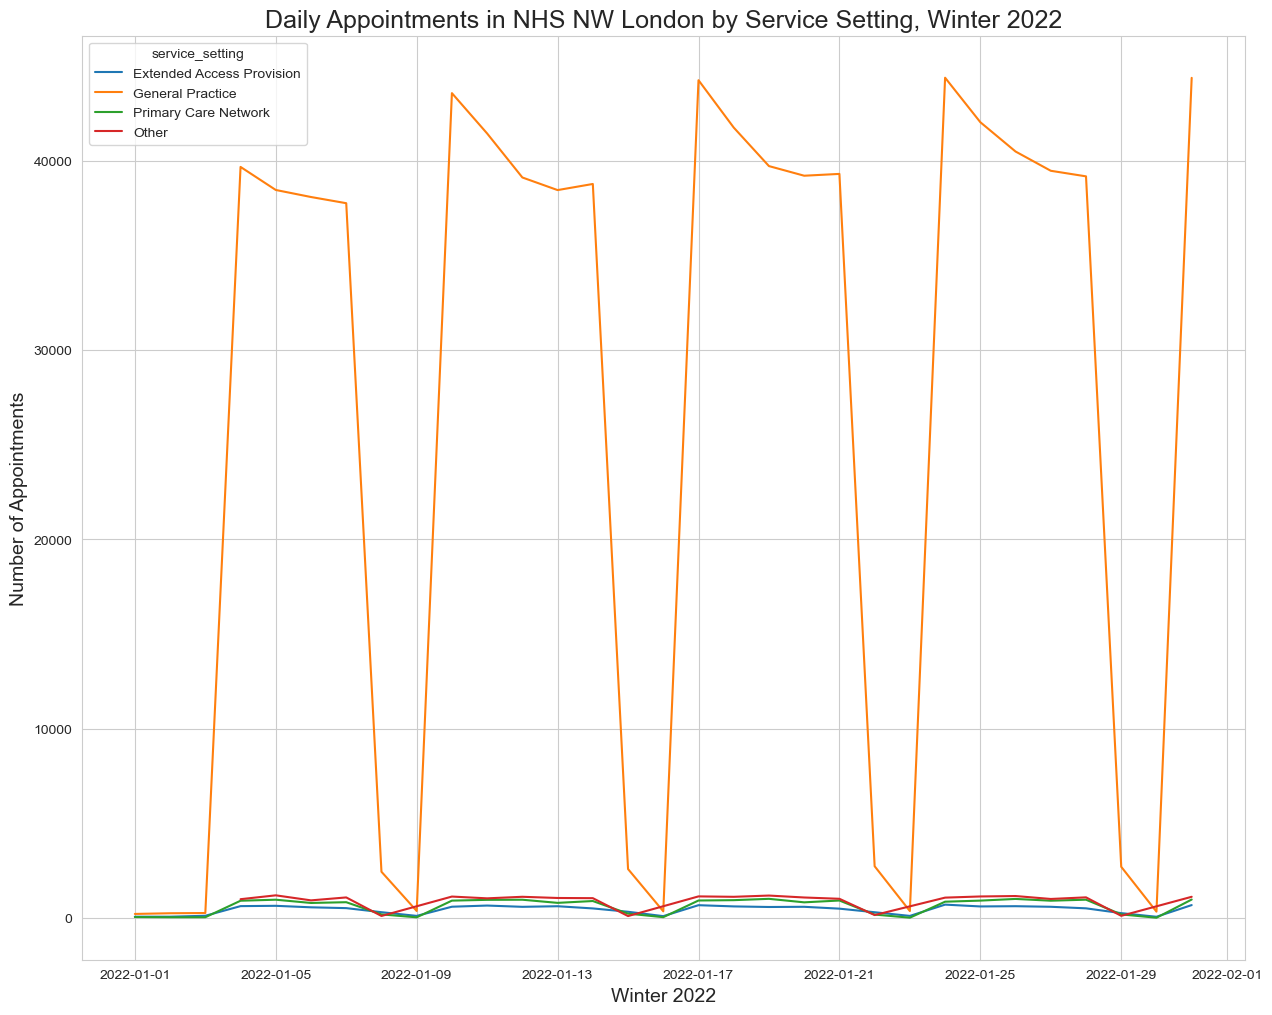

In [54]:
# Explore seasonal trends in appointment by service setting in Winter.
# Winter 2022 = January 2022

# Use groupby() to group appointment count by service setting.
# This DataFrame will be used for the Spring and Summer trends. 
# The appointment_date column is used to show daily trends. 
nc_ss_nwl = nc_nwl.groupby(['appointment_date', 'service_setting'])[['count_of_appointments']].sum().reset_index()

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn. 
# Set the date period to be used from the data. 
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_nwl[(nc_ss_nwl['appointment_date'] < '2022-02-01') 
                            & (nc_ss_nwl['appointment_date'] > '2021-12-31')], ci=None)

# Set the labels and title of the plot. 
plt.xlabel('Winter 2022', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Daily Appointments in NHS NW London by Service Setting, Winter 2022', fontsize=18)

# Save the plot.
fig.savefig('Daily Appointments Winter')

# Data shows more demand for appointments at the start of each week.

#### Spring 2022

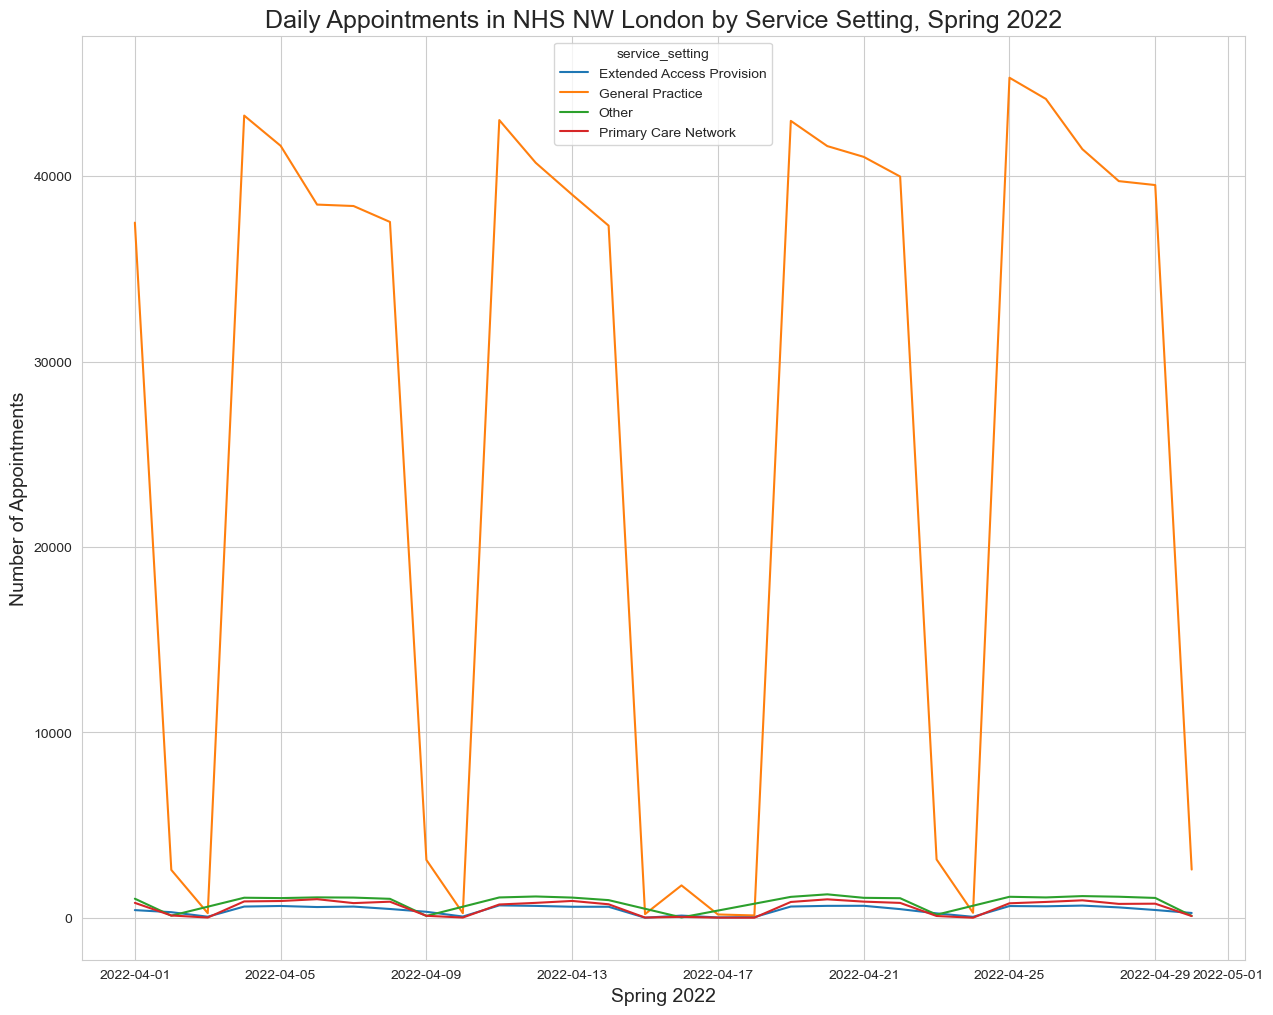

In [55]:
# Explore seasonal trends in appointment by service setting in Spring 2022. 
# Spring 2022 = April 2022. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn. 
# Set the date period to be used from the data. 
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_nwl[(nc_ss_nwl['appointment_date'] < '2022-05-01') 
                            & (nc_ss_nwl['appointment_date'] > '2022-03-31')], ci=None)

# Set the labels and title of the plot. 
plt.xlabel('Spring 2022', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.title('Daily Appointments in NHS NW London by Service Setting, Spring 2022', fontsize=18)

# Save the plot. 
fig.savefig('Daily Appointments Spring')

# Data shows more demand for appointments at the start of each week.

#### Summer 2022

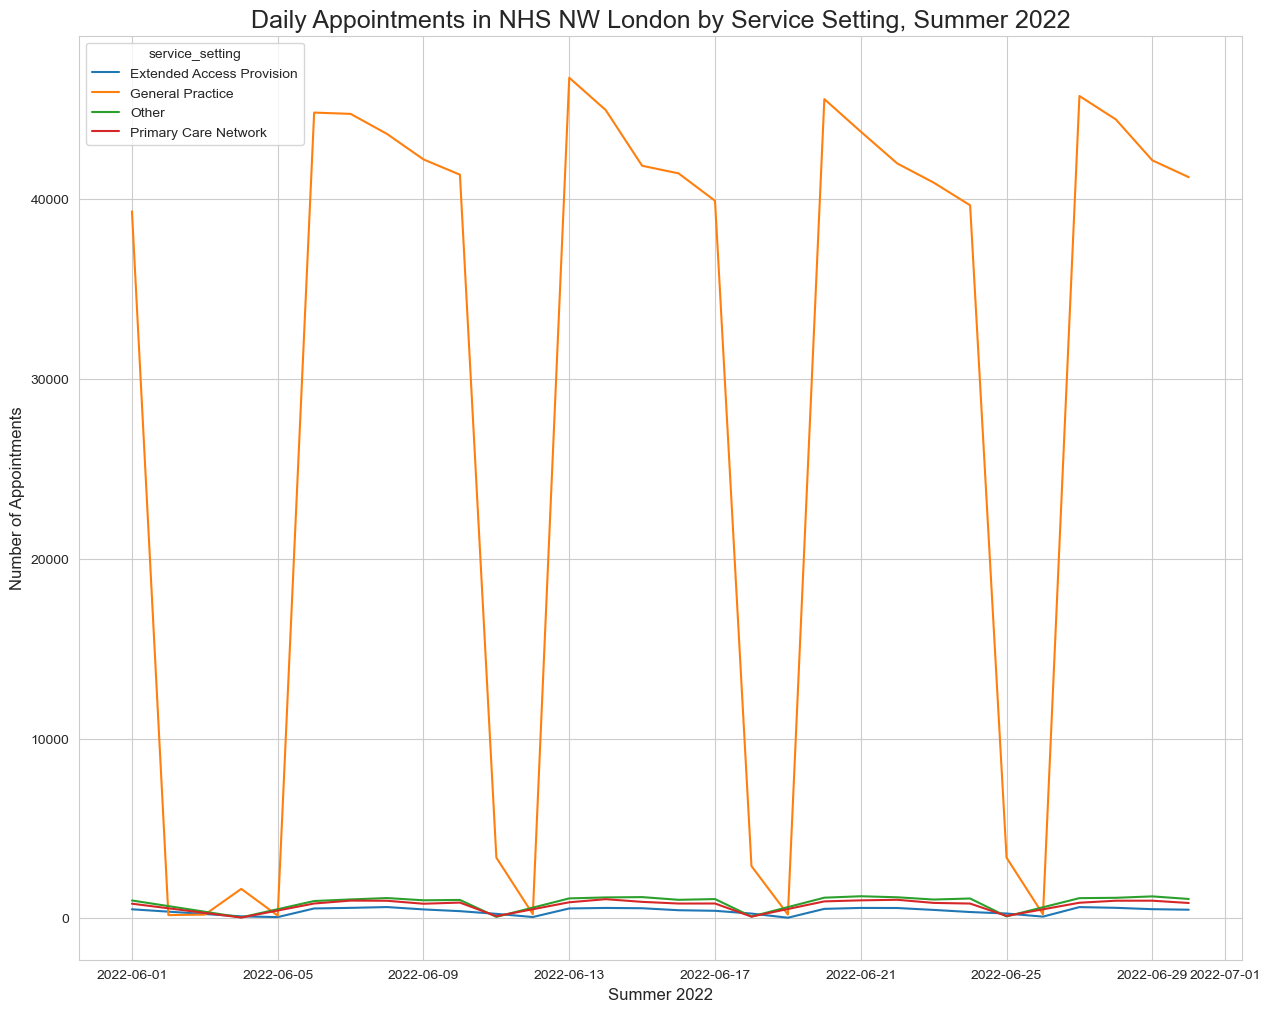

In [56]:
# Explore seasonal trends in appointment by service setting in Summer 2022. 
# Summer 2022 = June 2022. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn. 
# Set the date period to be used from the data.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', 
             data=nc_ss_nwl[(nc_ss_nwl['appointment_date'] < '2022-07-01') 
                            & (nc_ss_nwl['appointment_date'] > '2022-05-31')], ci=None)

# Set the labels and title of the plot.
plt.xlabel('Summer 2022', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.title('Daily Appointments in NHS NW London by Service Setting, Summer 2022', fontsize=18)

# Save the plot. 
fig.savefig('Daily Appointments Summer')

# Data shows more demand for appointments at the start of each week.

### Compare appointments in NHS NW London to all NHS. 

#### Compare appointment status (NWL vs NHS). 

In [57]:
# Determine appointments by status in NHS NW London. 

# Use groupby() to group appointment count by status. 
as_appt_nwl = ar_nwl.groupby('appointment_status')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
as_appt_nwl = calc_percent(as_appt_nwl)

# Rename the count_of_appointment and Percent columns.
as_appt_nwl = as_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
as_appt_nwl

,appointment_status,Appointment_count_nwl,Percent_nwl
0,Attended,6810372,94.9
1,DNA,369052,5.1


In [58]:
# Determine appointments by status for all NHS. 

# Use groupby() to group appointment count by status. 
as_appt_nhs = ar_clean.groupby('appointment_status')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
as_appt_nhs = calc_percent(as_appt_nhs)

# Rename the count_of_appointment and Percent columns.
as_appt_nhs = as_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})

# View the DataFrame. 
as_appt_nhs

,appointment_status,Appointment_count_nhs,Percent_nhs
0,Attended,645726093,95.6
1,DNA,29557950,4.4


In [59]:
# Merge DataFrames to compare percentages. 
as_comparison = pd.merge(as_appt_nhs, as_appt_nwl, how='left', on='appointment_status')

# Create a new DataFrame just showing percentages. 
as_percent = as_comparison[['appointment_status', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
as_percent

,appointment_status,Percent_nwl,Percent_nhs
0,Attended,94.9,95.6
1,DNA,5.1,4.4


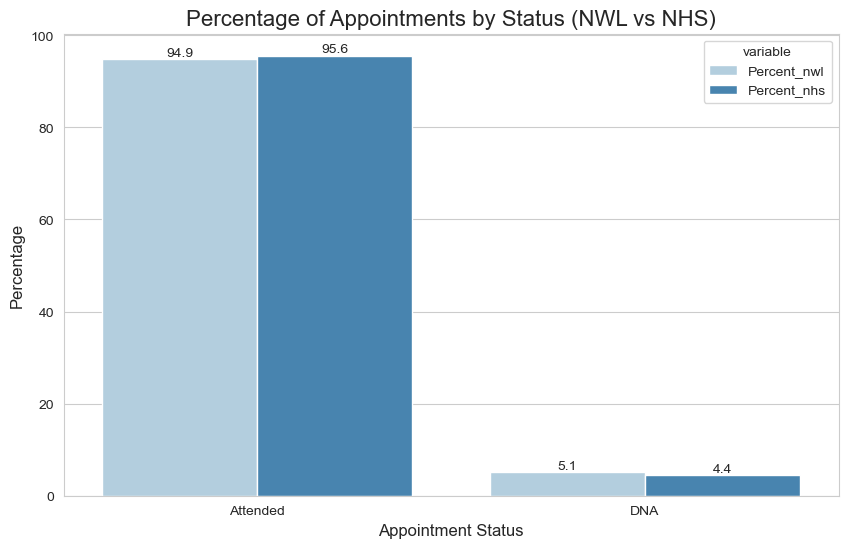

In [60]:
# Create a Seaborn barplot comparing NWL to NHS appointments by status.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='appointment_status', y='value', hue='variable', 
            data=as_percent.melt(id_vars='appointment_status'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Appointment Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Status (NWL vs NHS)', fontsize=16)

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('NWL NHS Appointment Status')

# Appoitment by status in NW London are comparable to the whole NHS. 

#### Compare service settings (NWL vs NHS). 

In [61]:
# Determine which service setting has the most appointments in NHS NW London. 

# Use groupby() to group appointment count by service setting. 
ss_appt_nwl = nc_nwl.groupby('service_setting')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ss_appt_nwl = calc_percent(ss_appt_nwl)

# Rename the count_of_appointment and Percent columns.
ss_appt_nwl = ss_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
ss_appt_nwl

,service_setting,Appointment_count_nwl,Percent_nwl
0,General Practice,5983578,94.0
1,Other,159841,2.5
2,Primary Care Network,130077,2.0
3,Extended Access Provision,92279,1.4


In [62]:
# Determine which service setting has the most appointments for all of NHS.

# Use groupby() to group appointment count by service setting. 
ss_appt_nhs = nc_clean.groupby('service_setting')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ss_appt_nhs = calc_percent(ss_appt_nhs)

# Rename the count_of_appointment and Percent columns.
ss_appt_nhs = ss_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})
# View the DataFrame. 
ss_appt_nhs

,service_setting,Appointment_count_nhs,Percent_nhs
0,General Practice,245814216,95.6
1,Primary Care Network,5744946,2.2
2,Other,3777544,1.5
3,Extended Access Provision,1738452,0.7


In [63]:
# Merge DataFrames to compare percentages. 
ss_comparison = pd.merge(ss_appt_nhs, ss_appt_nwl, how='left', on='service_setting')

# Create a new DataFrame just showing percentages. 
ss_percent = ss_comparison[['service_setting', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
ss_percent

,service_setting,Percent_nwl,Percent_nhs
0,General Practice,94.0,95.6
1,Primary Care Network,2.0,2.2
2,Other,2.5,1.5
3,Extended Access Provision,1.4,0.7


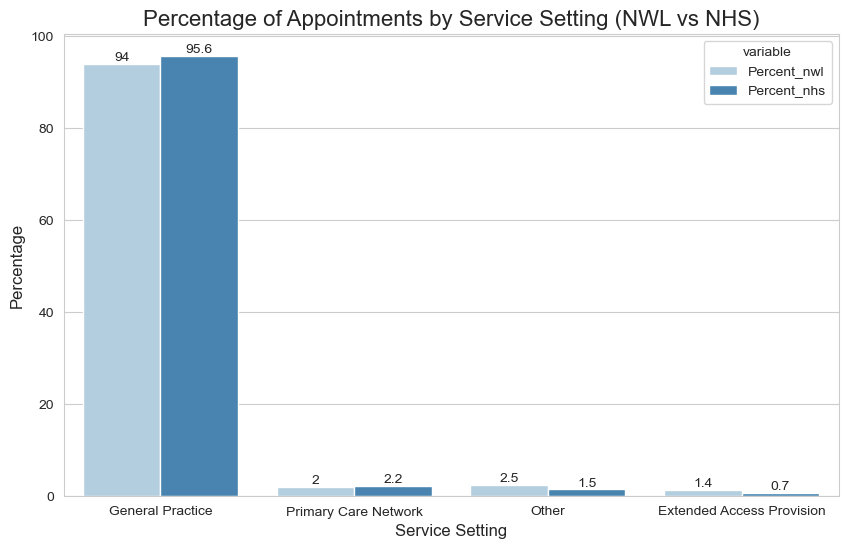

In [64]:
# Create a Seaborn barplot comparing NWL to NHS appointments by service setting.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='service_setting', y='value', hue='variable', 
            data=ss_percent.melt(id_vars='service_setting'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Service Setting', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Service Setting (NWL vs NHS)', fontsize=16)

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('NWL NHS Service Setting')

# Appointments by service settings in NW London are comparable to the whole NHS. 

#### Compare HCP type (NWL vs NHS). 

In [65]:
# Determine appointments by HCP type for NW London. 

# Use groupby() to group appointment count by HCP type. 
ht_appt_nwl = ar_nwl.groupby('hcp_type')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ht_appt_nwl = calc_percent(ht_appt_nwl)

# Rename the count_of_appointment and Percent columns.
ht_appt_nwl = ht_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
ht_appt_nwl

,hcp_type,Appointment_count_nwl,Percent_nwl
0,GP,3929773,54.7
1,Other Practice staff,3249651,45.3


In [66]:
# Determine appointments by HCP type for all NHS. 

# Use groupby() to group appointment count by HCP type. 
ht_appt_nhs = ar_clean.groupby('hcp_type')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
ht_appt_nhs = calc_percent(ht_appt_nhs)

# Rename the count_of_appointment and Percent columns.
ht_appt_nhs = ht_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})

# View the DataFrame. 
ht_appt_nhs

,hcp_type,Appointment_count_nhs,Percent_nhs
0,GP,361586160,53.5
1,Other Practice staff,313697883,46.5


In [67]:
# Merge DataFrames to compare percentages. 
ht_comparison = pd.merge(ht_appt_nhs, ht_appt_nwl, how='left', on='hcp_type')

# Create a new DataFrame just showing percentages. 
ht_percent = ht_comparison[['hcp_type', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
ht_percent

,hcp_type,Percent_nwl,Percent_nhs
0,GP,54.7,53.5
1,Other Practice staff,45.3,46.5


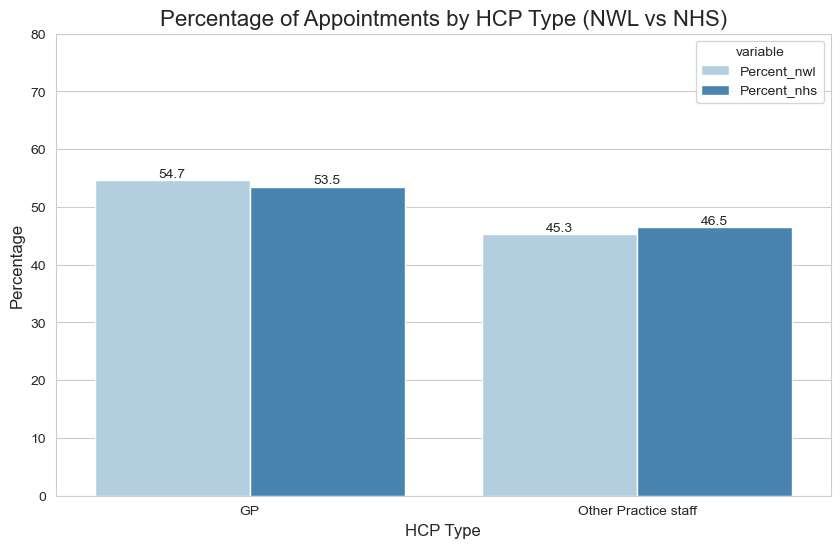

In [68]:
# Create a Seaborn barplot comparing NWL to NHS appointments by HCP Type.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='hcp_type', y='value', hue='variable', 
            data=ht_percent.melt(id_vars='hcp_type'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('HCP Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by HCP Type (NWL vs NHS)', fontsize=16)

# Reset the range of the y-axis to 80%. 
ax.set(ylim=(0, 80))

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('NWL NHS HCP Type')

# Appoitments by HCP Type in NW London are comparable to the whole NHS. 

#### Compare appointment mode (NWL vs NHS). 

In [69]:
# Determine appointments by mode for NW London. 

# Use groupby() to group appointment count by mode. 
md_appt_nwl = ar_nwl.groupby('appointment_mode')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
md_appt_nwl = calc_percent(md_appt_nwl)

# Rename the count_of_appointment and Percent columns.
md_appt_nwl = md_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
md_appt_nwl

,appointment_mode,Appointment_count_nwl,Percent_nwl
0,Face-to-Face,4335788,60.4
1,Telephone,2623011,36.5
2,Video/Online,204556,2.8
3,Home Visit,16069,0.2


In [70]:
# Determine appointments by mode for all NHS. 

# Use groupby() to group appointment count by mode. 
md_appt_nhs = ar_clean.groupby('appointment_mode')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
md_appt_nhs = calc_percent(md_appt_nhs)

# Rename the count_of_appointment and Percent columns.
md_appt_nhs = md_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})

# View the DataFrame. 
md_appt_nhs

,appointment_mode,Appointment_count_nhs,Percent_nhs
0,Face-to-Face,412866947,61.1
1,Telephone,255709363,37.9
2,Video/Online,3454429,0.5
3,Home Visit,3253304,0.5


In [71]:
# Merge DataFrames to compare percentages. 
md_comparison = pd.merge(md_appt_nhs, md_appt_nwl, how='left', on='appointment_mode')

# Create a new DataFrame just showing percentages. 
md_percent = md_comparison[['appointment_mode', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
md_percent

,appointment_mode,Percent_nwl,Percent_nhs
0,Face-to-Face,60.4,61.1
1,Telephone,36.5,37.9
2,Video/Online,2.8,0.5
3,Home Visit,0.2,0.5


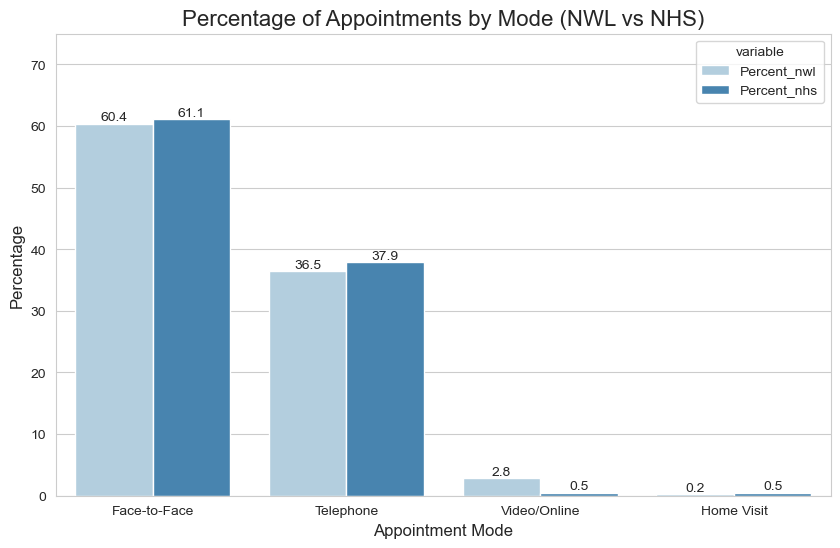

In [72]:
# Create a Seaborn barplot comparing NWL to NHS appointments by HCP Type.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='appointment_mode', y='value', hue='variable', 
            data=md_percent.melt(id_vars='appointment_mode'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Appointment Mode', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Mode (NWL vs NHS)', fontsize=16)

# Reset the range of the y-axis to 75%. 
ax.set(ylim=(0, 75))

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('NWL NHS Mode')

# Overall there are similar trends by appointment mode, with NW London using more video/online. 

#### Compare appointment booking time (NWL vs NHS). 

In [73]:
# Determine appointments by booking time for NW London. 

# Use groupby() to group appointment count by booking time. 
tba_appt_nwl = ar_nwl.groupby('time_between_book_and_appointment')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
tba_appt_nwl = calc_percent(tba_appt_nwl)

# Rename the count_of_appointment and Percent columns. 
tba_appt_nwl = tba_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
tba_appt_nwl

,time_between_book_and_appointment,Appointment_count_nwl,Percent_nwl
0,Same Day,3150395,43.9
1,2 to 7 Days,1691074,23.6
2,8 to 14 Days,875814,12.2
3,1 Day,840758,11.7
4,15 to 21 Days,352200,4.9
5,22 to 28 Days,165199,2.3
6,More than 28 Days,103984,1.4


In [74]:
# Determine appointments by booking time for all NHS.  

# Use groupby() to group appointment count by mode. 
tba_appt_nhs = ar_clean.groupby('time_between_book_and_appointment')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
tba_appt_nhs = calc_percent(tba_appt_nhs)

# Rename the count_of_appointment and Percent columns. 
tba_appt_nhs = tba_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})
# View the DataFrame. 
tba_appt_nhs

,time_between_book_and_appointment,Appointment_count_nhs,Percent_nhs
0,Same Day,314658406,46.6
1,2 to 7 Days,141409934,20.9
2,8 to 14 Days,78883217,11.7
3,1 Day,61948390,9.2
4,15 to 21 Days,38042190,5.6
5,22 to 28 Days,22171683,3.3
6,More than 28 Days,18170223,2.7


In [75]:
# Merge DataFrames to compare percentages.  
tba_comparison = pd.merge(tba_appt_nhs, tba_appt_nwl, how='left', on='time_between_book_and_appointment')

# Create a new DataFrame just showing percentages. 
tba_percent = tba_comparison[['time_between_book_and_appointment', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
tba_percent

,time_between_book_and_appointment,Percent_nwl,Percent_nhs
0,Same Day,43.9,46.6
1,2 to 7 Days,23.6,20.9
2,8 to 14 Days,12.2,11.7
3,1 Day,11.7,9.2
4,15 to 21 Days,4.9,5.6
5,22 to 28 Days,2.3,3.3
6,More than 28 Days,1.4,2.7


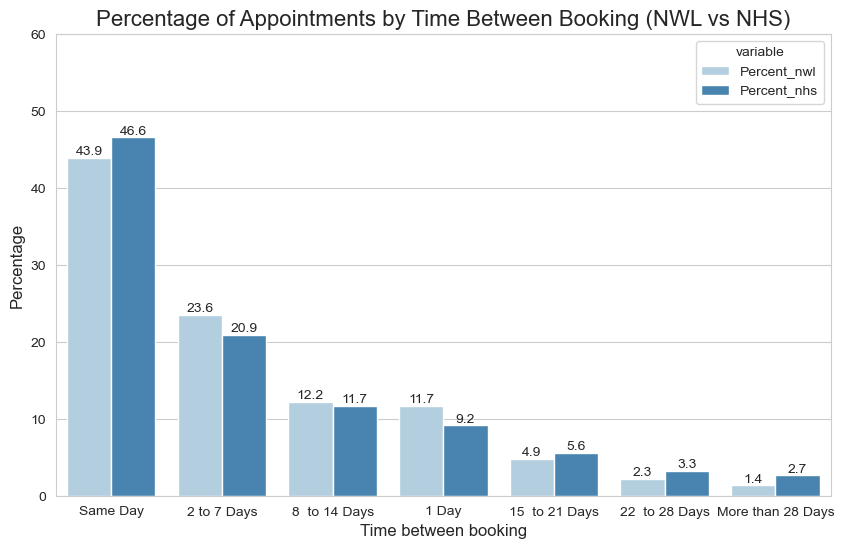

In [76]:
# Create a Seaborn barplot comparing NWL to NHS appointments by time between booking. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='time_between_book_and_appointment', y='value', hue='variable', 
            data=tba_percent.melt(id_vars='time_between_book_and_appointment'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Time between booking', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Time Between Booking (NWL vs NHS)', fontsize=16)

# Reset the range of the y-axis to 60%. 
ax.set(ylim=(0, 60))

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('NWL NHS Time Booking')

# Overall there are similar trends by time between booking.
# NHS NW London has a lower percentage of same day appointments.
# NHS NW London has a higher percentage of 2 -7 days and 1 day between appointments. 

#### Compare appointment duration (NWL vs NHS). 

In [77]:
# Determine appointments by duation for NW London. 

# Use groupby() to group appointment count by booking time. 
dur_appt_nwl = ad_nwl.groupby('actual_duration')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
dur_appt_nwl = calc_percent(dur_appt_nwl)

# Rename the count_of_appointment and Percent columns. 
dur_appt_nwl = dur_appt_nwl.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

# View the DataFrame. 
dur_appt_nwl

,actual_duration,Appointment_count_nwl,Percent_nwl
0,6-10 Minutes,1408906,26.9
1,1-5 Minutes,1328946,25.4
2,11-15 Minutes,982611,18.8
3,16-20 Minutes,593838,11.4
4,21-30 Minutes,549131,10.5
5,31-60 Minutes,366760,7.0


In [78]:
# Determine appointments by duration for all NHS.  

# Use groupby() to group appointment count by duration. 
dur_appt_nhs = ad_clean.groupby('actual_duration')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False).reset_index()

# Call user defined function.
dur_appt_nhs = calc_percent(dur_appt_nhs)

# Rename the count_of_appointment and Percent columns. 
dur_appt_nhs = dur_appt_nhs.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})

# View the DataFrame. 
dur_appt_nhs

,actual_duration,Appointment_count_nhs,Percent_nhs
0,6-10 Minutes,33800815,26.5
1,1-5 Minutes,28600865,22.4
2,11-15 Minutes,25160882,19.7
3,16-20 Minutes,16004247,12.5
4,21-30 Minutes,15026365,11.8
5,31-60 Minutes,9103432,7.1


In [79]:
# Merge DataFrames to compare percentages. 
dur_comparison = pd.merge(dur_appt_nhs, dur_appt_nwl, how='left', on='actual_duration')

# Create a new DataFrame just showing percentages. 
dur_percent = dur_comparison[['actual_duration', 'Percent_nwl', 'Percent_nhs']]

# View the DataFrame. 
dur_percent

,actual_duration,Percent_nwl,Percent_nhs
0,6-10 Minutes,26.9,26.5
1,1-5 Minutes,25.4,22.4
2,11-15 Minutes,18.8,19.7
3,16-20 Minutes,11.4,12.5
4,21-30 Minutes,10.5,11.8
5,31-60 Minutes,7.0,7.1


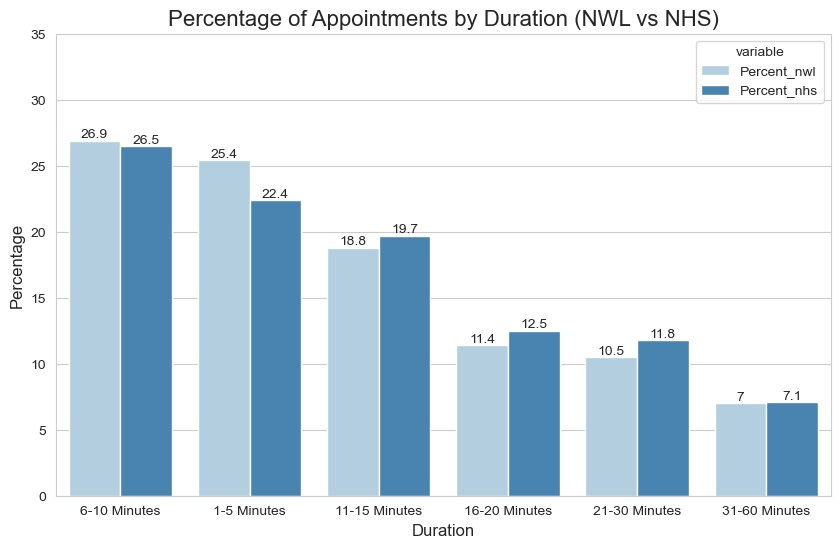

In [80]:
# Create a Seaborn barplot comparing NWL to NHS appointments by duration. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='actual_duration', y='value', hue='variable', 
            data=dur_percent.melt(id_vars='actual_duration'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Duration (NWL vs NHS)', fontsize=16)

# Reset the range of the y-axis to 60%. 
ax.set(ylim=(0, 35))

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Save the plot.
fig.savefig('NWL NHS Duration')
    
# Overall there are similar trends by appointment duration.
# NHS NW London has a higher percentage of 1-5 minute appointments.
# NHS NW London has a lower percentage of appointments above 10 minutes. 

### Impact of different factors on appointment status in NHS NW London.

#### Attended vs DNA appointments by HCP type.

In [81]:
# Determine relationship between appointment status and HCP type. 

# Use groupby() to group appointment count by HCP and appointment status. 
nwl_hcpgroup = ar_nwl.groupby(['appointment_month', 'hcp_type', 
                               'appointment_status'])[['count_of_appointments']].sum().reset_index()

# View the DataFrame. 
print(nwl_hcpgroup.shape)
nwl_hcpgroup.head()

(28, 4)


,appointment_month,hcp_type,appointment_status,count_of_appointments
0,2021-12,GP,Attended,518588
1,2021-12,GP,DNA,15549
2,2021-12,Other Practice staff,Attended,386382
3,2021-12,Other Practice staff,DNA,36060
4,2022-01,GP,Attended,538142


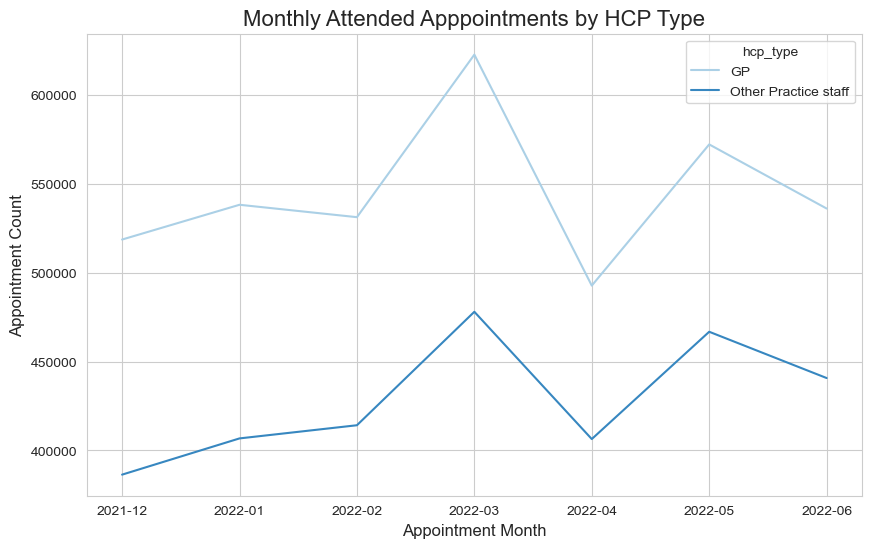

In [82]:
# Plot attended appointments by HCP status. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify Attended in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', 
             data=nwl_hcpgroup[(nwl_hcpgroup['appointment_status'] == 'Attended')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Attended Apppointments by HCP Type', fontsize=16)

# Save the plot.
fig.savefig('NWL Attended HCP')

# A previous chart showed that the split of appointments was relatively even.
# 54% to GPs, 47% to Other Practice Staff. 
# The chart below shows that more Attended appointments are with GPs. 

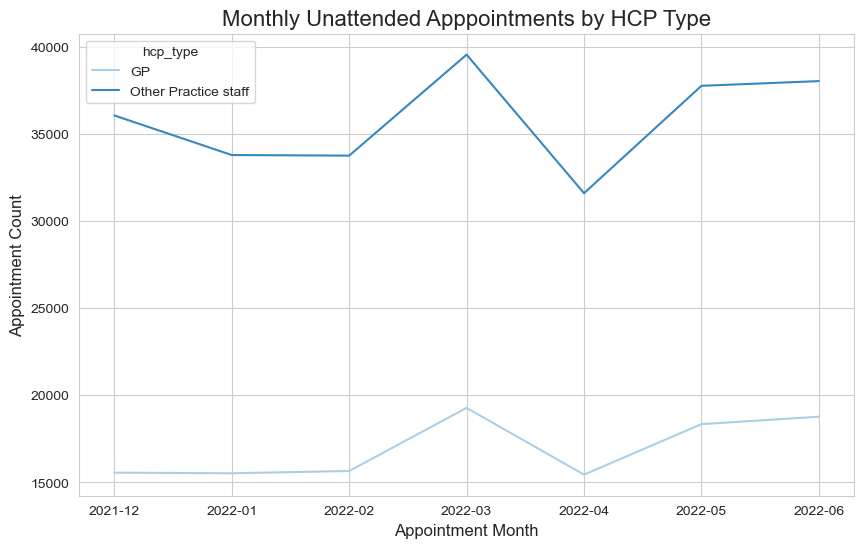

In [83]:
# Plot DNA appointments by HCP status. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify DNA in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', 
             data=nwl_hcpgroup[(nwl_hcpgroup['appointment_status'] == 'DNA')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Unattended Apppointments by HCP Type', fontsize=16)

# Save the plot.
fig.savefig('NWL Unattended HCP')

# The chart below shows that significantly more DNA appointments are with Other Practice staff. 

#### Attended vs DNA appointments by appointment mode.

In [84]:
# Determine relationship between appointment status and appointment mode. 

# Use groupby() to group appointment count by appointment status and mode. 
nwl_modegroup = ar_nwl.groupby(['appointment_month', 'appointment_mode', 
                                'appointment_status'])[['count_of_appointments']].sum().reset_index()

# View the DataFrame. 
print(nwl_modegroup.shape)
nwl_modegroup.head()

(56, 4)


,appointment_month,appointment_mode,appointment_status,count_of_appointments
0,2021-12,Face-to-Face,Attended,528061
1,2021-12,Face-to-Face,DNA,40767
2,2021-12,Home Visit,Attended,2137
3,2021-12,Home Visit,DNA,120
4,2021-12,Telephone,Attended,350178


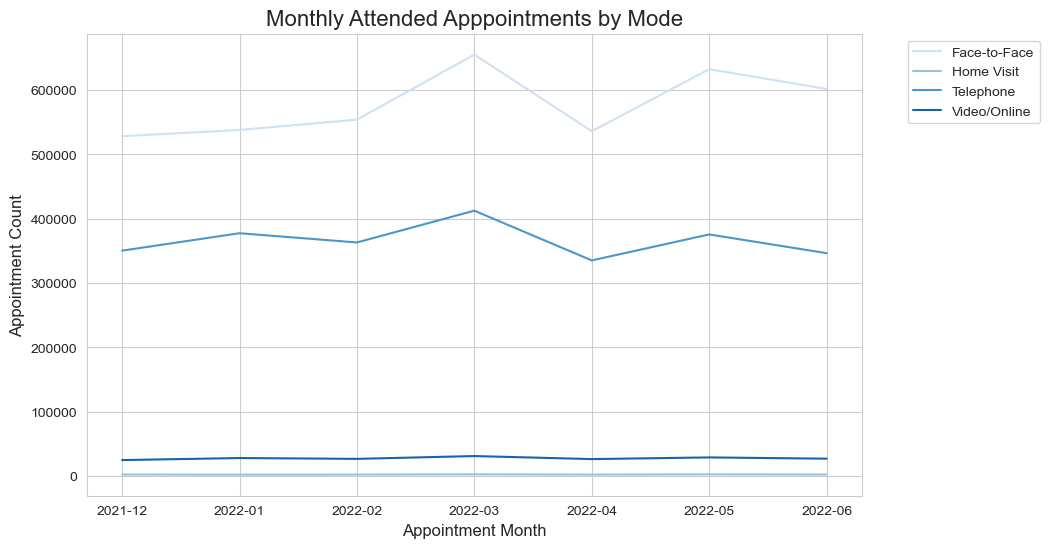

In [85]:
# Plot Attended appointments by appointment mode. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify Attended in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', 
             data=nwl_modegroup[(nwl_modegroup['appointment_status'] == 'Attended')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Attended Apppointments by Mode', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('NWL Aattended mode')

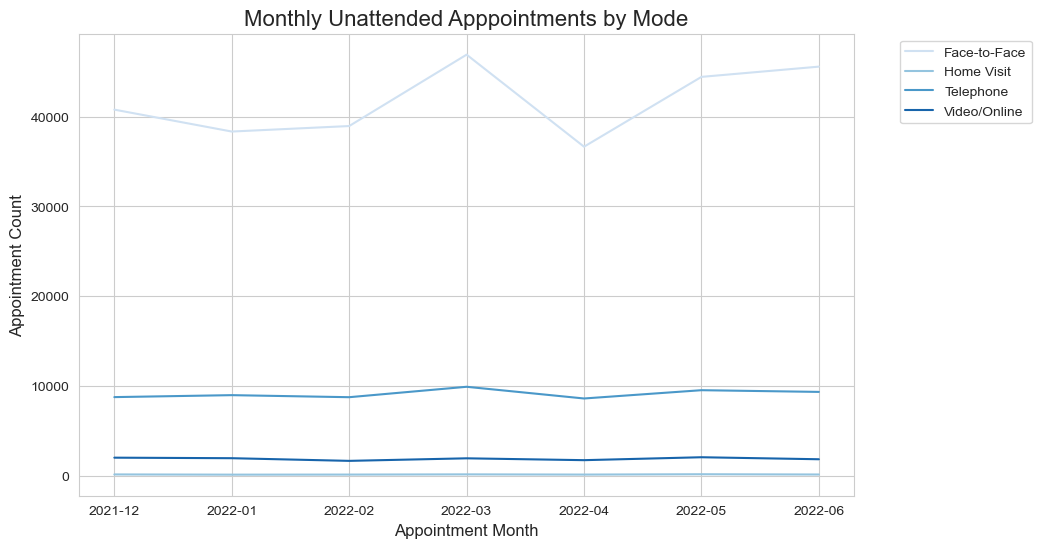

In [86]:
# Plot DNA appointments by appointment mode. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify DNA in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', 
             data=nwl_modegroup[(nwl_modegroup['appointment_status'] == 'DNA')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Unattended Apppointments by Mode', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('NWL Unattended mode')

#### Attended vs DNA appointments by time between booking. 

In [87]:
# Determine relationship between appointment status and time between booking. 

# Use groupby() to group appointment count by appointment status and mode. 
nwl_timegroup = ar_nwl.groupby(['appointment_month', 'time_between_book_and_appointment', 
                                'appointment_status'])[['count_of_appointments']].sum().reset_index()

# View the DataFrame. 
print(nwl_timegroup.shape)
nwl_timegroup

(98, 4)


,appointment_month,time_between_book_and_appointment,appointment_status,count_of_appointments
0,2021-12,1 Day,Attended,105993
1,2021-12,1 Day,DNA,5733
2,2021-12,15 to 21 Days,Attended,45166
3,2021-12,15 to 21 Days,DNA,5243
4,2021-12,2 to 7 Days,Attended,197610
...,...,...,...,...
93,2022-06,8 to 14 Days,DNA,12694
94,2022-06,More than 28 Days,Attended,18098
95,2022-06,More than 28 Days,DNA,2438
96,2022-06,Same Day,Attended,426862


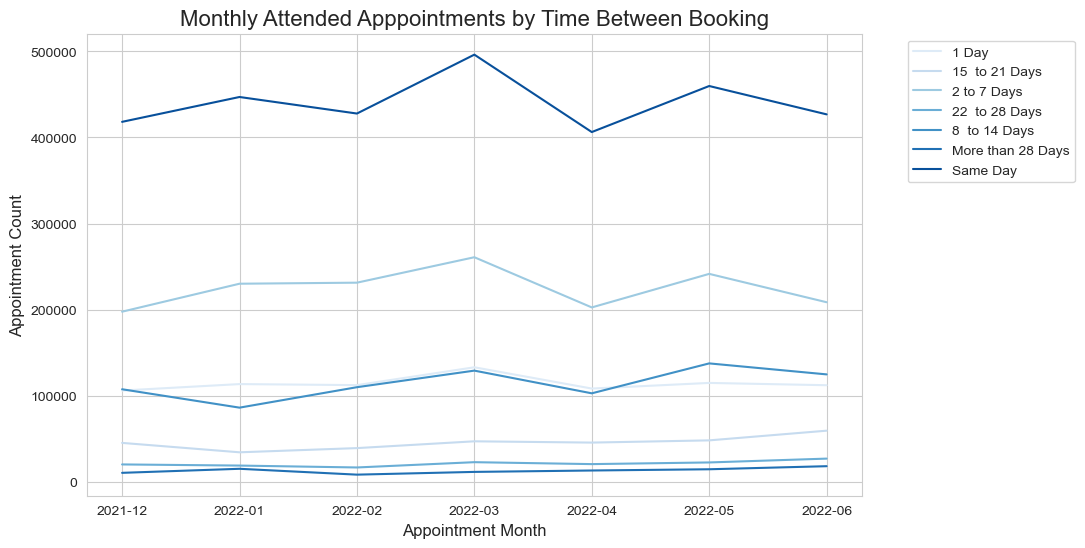

In [88]:
# Plot Attended appointments by time between booking. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify Attended in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', 
             data=nwl_timegroup[(nwl_timegroup['appointment_status'] == 'Attended')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Attended Apppointments by Time Between Booking', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('NWL Attended time booking')

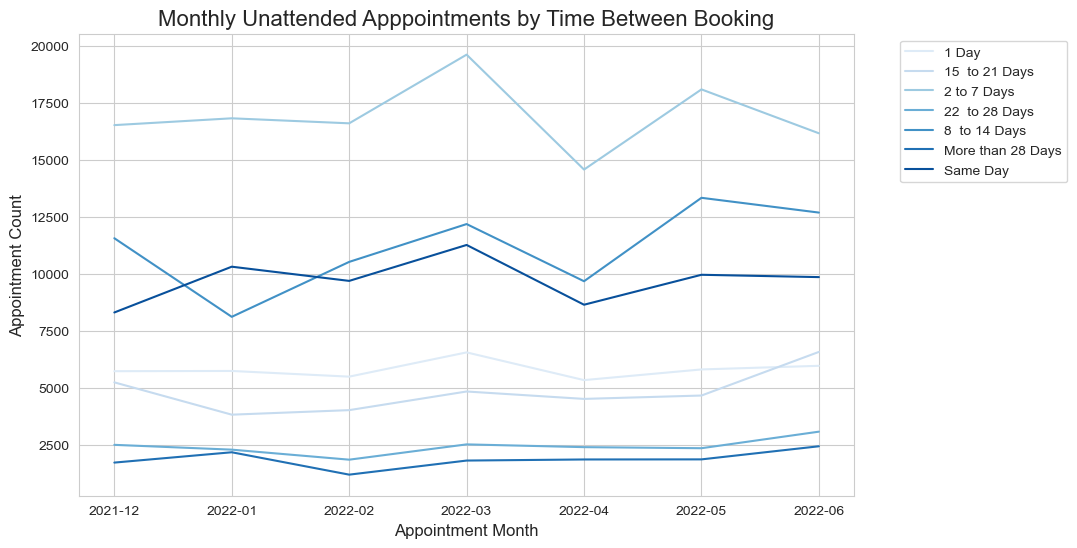

In [89]:
# Plot DNA appointments by time between booking. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Specify DNA in appointment_status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', 
             data=nwl_timegroup[(nwl_timegroup['appointment_status'] == 'DNA')],
             palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Unattended Apppointments by Time Between Booking', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('NWL Unattended time booking')

# Data shows an upward trend of DNA appointments with booking times longer than 8 days. 

### Utilisation rates.

In [90]:
# Calculate utilisation rate for the whole NHS. 

# Determine the total number of appointments per month.
ar_filtered = ar_clean[ar_clean['appointment_month'] > '2021-11']

# Use groupby() to group appointment count by month. 
ar_util_nhs = ar_filtered.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_util_nhs['daily_utilisation_nhs'] = (ar_util_nhs['count_of_appointments'] / 30).round(1)

# Rename the count_of_appointment column.
ar_util_mhs = ar_util_nhs.rename(columns={'count_of_appointments': 'appointment_count_nhs'})

# See % of utilisation if NHS can accommodate 1,200,000 appointments per day. 
ar_util_nhs['daily_utilisation_rate_nhs'] = ((ar_util_nhs['daily_utilisation_nhs'] / 1200000) * 100).round(1)

ar_util_nhs

,appointment_month,count_of_appointments,daily_utilisation_nhs,daily_utilisation_rate_nhs
0,2021-12,23001434,766714.5,63.9
1,2022-01,23693920,789797.3,65.8
2,2022-02,23445300,781510.0,65.1
3,2022-03,27320584,910686.1,75.9
4,2022-04,22059473,735315.8,61.3
5,2022-05,25511141,850371.4,70.9
6,2022-06,23918495,797283.2,66.4


In [91]:
# Calculate utilisation rate for the NHS NW London

# Determine the total number of appointments per month in NWL.
# Based on population served of 2.1 million, which is 4% of 53 million (England).
# 4% of 1,200,000 is 48,000. 

# Use groupby() to group appointment count by month. 
ar_util_nwl = ar_nwl.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_util_nwl['daily_utilisation_nwl'] = (ar_util_nwl['count_of_appointments'] / 30).round(1)

# Rename the count_of_appointment column.
ar_util_nwl = ar_util_nwl.rename(columns={'count_of_appointments': 'appointment_count_nwl'})

# See % of utilisation if NHS NWL can accommodate 48,000 appointments per day. 
ar_util_nwl['daily_utilisation_rate_nwl'] = ((ar_util_nwl['daily_utilisation_nwl'] / 48000) * 100).round(1)

# View the DataFrame. 
ar_util_nwl

,appointment_month,appointment_count_nwl,daily_utilisation_nwl,daily_utilisation_rate_nwl
0,2021-12,956579,31886.0,66.4
1,2022-01,994202,33140.1,69.0
2,2022-02,994728,33157.6,69.1
3,2022-03,1159359,38645.3,80.5
4,2022-04,946111,31537.0,65.7
5,2022-05,1094914,36497.1,76.0
6,2022-06,1033531,34451.0,71.8


In [92]:
# Merge the DataFrames.  
util_comparison = pd.merge(ar_util_nwl, ar_util_nhs, how='left', on='appointment_month')

# Use loc to just select certain columns. 
util_comparison_subset = util_comparison.loc[:, ['appointment_month', 'daily_utilisation_rate_nhs', 
                                                 'daily_utilisation_rate_nwl']]

# View the DataFrame. 
util_comparison_subset

# Data shows that utilisation rates are between 65-82% across the NHS. 

,appointment_month,daily_utilisation_rate_nhs,daily_utilisation_rate_nwl
0,2021-12,63.9,66.4
1,2022-01,65.8,69.0
2,2022-02,65.1,69.1
3,2022-03,75.9,80.5
4,2022-04,61.3,65.7
5,2022-05,70.9,76.0
6,2022-06,66.4,71.8


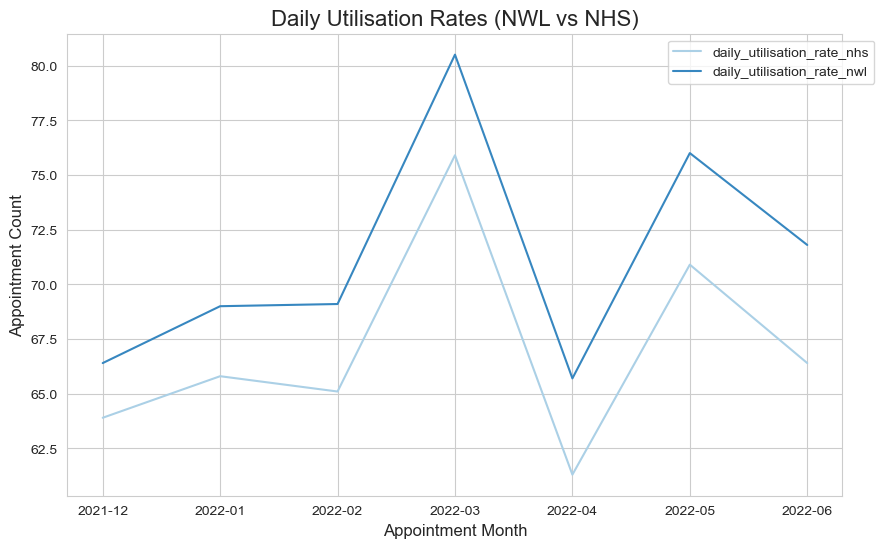

In [93]:
# Plot utilisation rates of NWL and whole NHS. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.lineplot(x='appointment_month', y='value', hue='variable', 
            data=util_comparison_subset.melt(id_vars='appointment_month'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Daily Utilisation Rates (NWL vs NHS)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('Daily Utilisation NWL NHS')

# Data shows that NHS NW London has a high utilisation rates than the whole NHS. 

### Appointment duration.

#### Compare appointments above and below 10 minutes for NWL and NHS. 

In [94]:
# See number and percentage of appointments in NWL by duration. 

# Use groupby() to group appointment count by actual duration. 
duration_nwl = ad_nwl.groupby('actual_duration')['count_of_appointments'].sum()

nwl_split = pd.DataFrame({'actual_duration': ['<10 Minutes', '>10 Minutes'], 
                            'count_of_appointments': [duration_nwl['1-5 Minutes'] 
                                                      + duration_nwl['6-10 Minutes'], 
                                                     duration_nwl['11-15 Minutes'] 
                                                      + duration_nwl['16-20 Minutes'] 
                                                      + duration_nwl['21-30 Minutes'] 
                                                      + duration_nwl['31-60 Minutes']]}).reset_index()
# Call user defined function.
nwl_split = calc_percent(nwl_split)


# Rename the count_of_appointment and Percent columns.
nwl_split = nwl_split.rename(columns={'count_of_appointments': 'Appointment_count_nwl', 
                                            'Percent': 'Percent_nwl'})

nwl_split

,index,actual_duration,Appointment_count_nwl,Percent_nwl
0,0,<10 Minutes,2737852,52.3
1,1,>10 Minutes,2492340,47.7


In [95]:
# See number and percentage of appointments in NHS by duration. 

# Use groupby() to group appointment count by actual duration. 
duration_nhs = ad_clean.groupby('actual_duration')['count_of_appointments'].sum()

nhs_split = pd.DataFrame({'actual_duration': ['<10 Minutes', '>10 Minutes'], 
                            'count_of_appointments': [duration_nhs['1-5 Minutes'] 
                                                      + duration_nhs['6-10 Minutes'], 
                                                     duration_nhs['11-15 Minutes'] 
                                                      + duration_nhs['16-20 Minutes'] 
                                                      + duration_nhs['21-30 Minutes'] 
                                                      + duration_nhs['31-60 Minutes']]}).reset_index()

# Call user defined function.
nhs_split = calc_percent(nhs_split)

# Rename the count_of_appointment and Percent columns.
nhs_split = nhs_split.rename(columns={'count_of_appointments': 'Appointment_count_nhs', 
                                            'Percent': 'Percent_nhs'})

nhs_split

,index,actual_duration,Appointment_count_nhs,Percent_nhs
0,0,<10 Minutes,62401680,48.9
1,1,>10 Minutes,65294926,51.1


In [96]:
# Merge the DataFrames.  
appt_duration = pd.merge(nwl_split, nhs_split, how='left', on='actual_duration')

# Use loc to just select certain columns. 
appt_duration_subset = appt_duration.loc[:, ['actual_duration', 'Percent_nwl', 
                                                 'Percent_nhs']]

# View the DataFrame. 
appt_duration_subset

,actual_duration,Percent_nwl,Percent_nhs
0,<10 Minutes,52.3,48.9
1,>10 Minutes,47.7,51.1


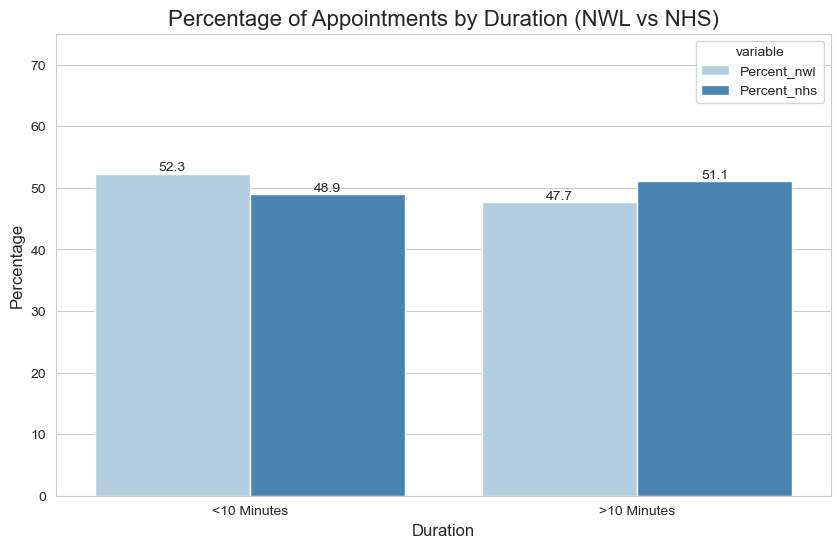

In [97]:
# Create a Seaborn barplot comparing NWL to NHS appointments by duration.

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a boxplot using Seaborn.
# Use melt() to reshape the data and combine two columns into a single column value. 
sns.barplot(x='actual_duration', y='value', hue='variable', 
            data=appt_duration_subset.melt(id_vars='actual_duration'), palette='Blues')

# Set the labels and title of the plot
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Appointments by Duration (NWL vs NHS)', fontsize=16)

# Reset the range of the y-axis to 75%. 
ax.set(ylim=(0, 75))

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)
    
# Save the plot.
fig.savefig('Duration 10mins NWL NHS')

# Data shows a higher percentage of appointments less than 10mins in NWL. 
# GP appointments are currently 10 mins long in the UK.

#### Compare monthly duration of appointments, NWL and NHS. 

In [98]:
# See count of monthly appointments by duration for NWL. 

# Use groupby() to group appointment count by appointment status and duration. 
nwl_durationgroup = ad_nwl.groupby(['appointment_month', 'actual_duration'])[['count_of_appointments']].sum()

# View the DataFrame. 
nwl_durationgroup.head(6)

count_of_appointments
appointment_month actual_duration                       
2021-12           1-5 Minutes                     185787
                  11-15 Minutes                   127172
                  16-20 Minutes                    76125
                  21-30 Minutes                    69805
                  31-60 Minutes                    47025
                  6-10 Minutes                    189467

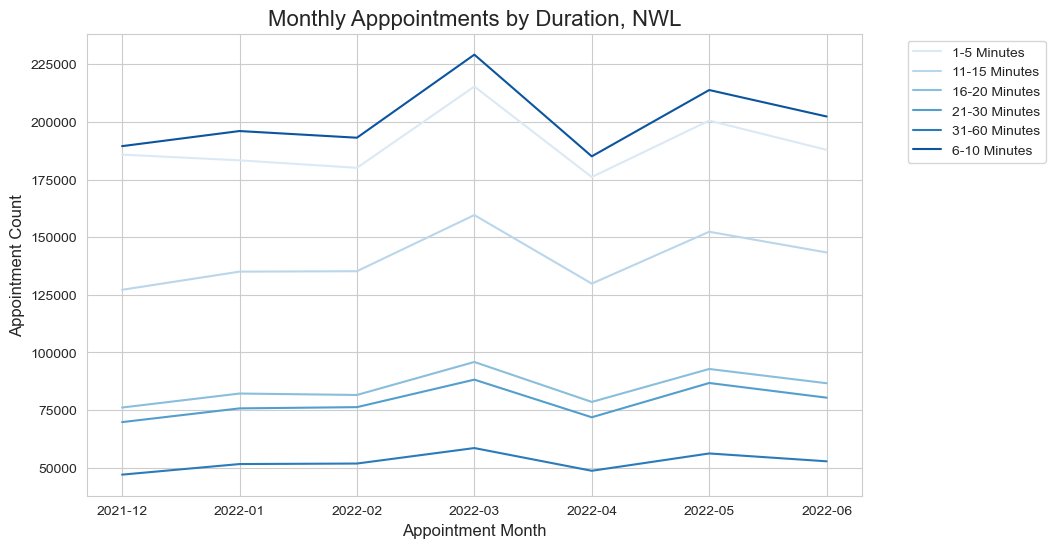

In [99]:
# Plot monthly appointments by duration for NWL. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='actual_duration', 
             data=nwl_durationgroup, palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Apppointments by Duration, NWL', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('Monthly Duration NWL')

In [100]:
# See count of monthly appointments by duration for NHS. 

# Use groupby() to group appointment count by appointment status and duration. 
nhs_durationgroup = ad_clean.groupby(['appointment_month', 'actual_duration'])[['count_of_appointments']].sum()

# View the DataFrame. 
nhs_durationgroup.head(6)

count_of_appointments
appointment_month actual_duration                       
2021-12           1-5 Minutes                    4266686
                  11-15 Minutes                  3280132
                  16-20 Minutes                  2023774
                  21-30 Minutes                  1885864
                  31-60 Minutes                  1163515
                  6-10 Minutes                   4654000

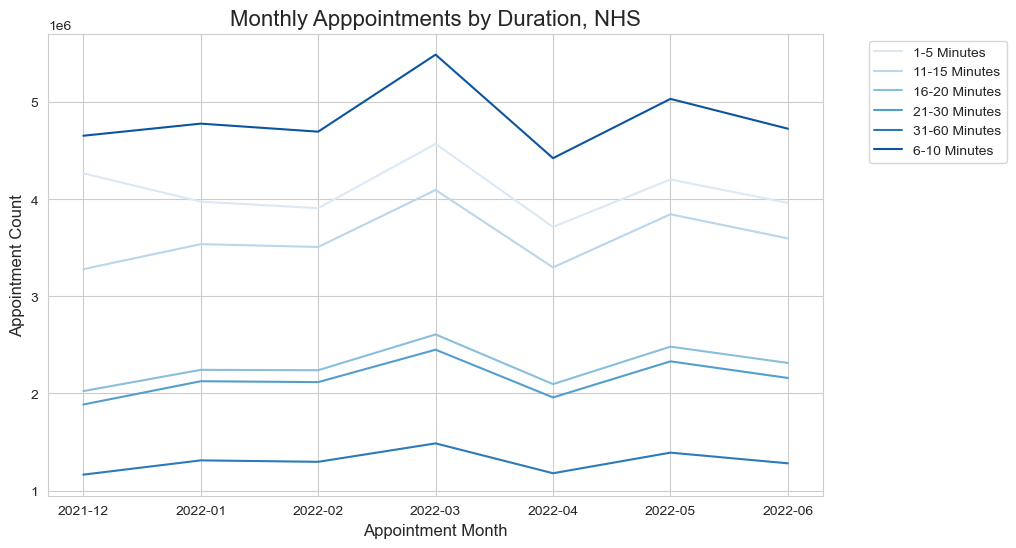

In [101]:
# Plot monthly appointments by duration for NHS. 

# Set the size and style of the plot. 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set_style('whitegrid')

# Create a lineplot using Seaborn.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='actual_duration', 
             data=nhs_durationgroup, palette='Blues', ci=None)

# Set the labels and title of the plot
plt.xlabel('Appointment Month', fontsize=12)
plt.ylabel('Appointment Count', fontsize=12)
plt.title('Monthly Apppointments by Duration, NHS', fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1))

# Save the plot.
fig.savefig('Monthly Duration NHS')

### Check if relationship can be inferred between duration and HCP type.

In [112]:
# Check for any relationship between Attended appointments and HCP type
# Will merge original (uncleaned) ad and ar DataFrames.
# Appointment numbers match on uncleaned DataFrames. 

# Subset ar dataset to Attended appointments between Dec 2021 to Jun 2022. 
ar_sub = ar[(ar['appointment_status'] == 'Attended') & (ar['appointment_month'] > '2021-11') 
            & ((ar['hcp_type'] == 'GP') | (ar['hcp_type'] == 'Other Practice staff'))]

# View the DataFrame. 
ar_sub.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
4423,E54000034,2021-12,Attended,GP,Face-to-Face,1 Day,7152
4424,E54000034,2021-12,Attended,GP,Face-to-Face,15 to 21 Days,3005
4425,E54000034,2021-12,Attended,GP,Face-to-Face,2 to 7 Days,9926
4426,E54000034,2021-12,Attended,GP,Face-to-Face,22 to 28 Days,875
4427,E54000034,2021-12,Attended,GP,Face-to-Face,8 to 14 Days,5557


In [113]:
# Use groupby() to group appointment count by appointment month and HCP type.
ar_hcp = ar_sub.groupby(['appointment_month', 'hcp_type'])[['count_of_appointments']].sum()

# View the DataFrame. 
ar_hcp.head()

count_of_appointments
appointment_month hcp_type                                   
2021-12           GP                                 11963924
                  Other Practice staff               10118453
2022-01           GP                                 12481641
                  Other Practice staff               10406441
2022-02           GP                                 12206696

In [110]:
# Pivot the resulting DataFrame to allow merge with ad DataFrame on monnth. 

ar_hcp_pivot = ar_hcp.pivot_table(index='appointment_month', columns=['hcp_type'], 
                                      values='count_of_appointments')

# View the DataFrame. 
ar_hcp_pivot

hcp_type,GP,Other Practice staff
appointment_month,,
2021-12,11963924,10118453
2022-01,12481641,10406441
2022-02,12206696,10426301
2022-03,14315058,12010071
2022-04,11265191,9974165
2022-05,13059755,11488134
2022-06,12182292,10785497


In [111]:
# Now look at the ad DataFrame. 
# Use groupby() to group appointment count by appointment month and appointment duration.

ad_sub = ad.groupby(['appointment_month', 'actual_duration'])[['count_of_appointments']].sum()

# View the DataFrame. 
ad_sub.head()

count_of_appointments
appointment_month actual_duration                       
2021-12           1-5 Minutes                    4266686
                  11-15 Minutes                  3280132
                  16-20 Minutes                  2023774
                  21-30 Minutes                  1885864
                  31-60 Minutes                  1163515

In [114]:
# Pivot the resulting DataFrame to allow merge with ar DataFrame on month. 
ad_dur_pivot = ad_sub.pivot_table(index='appointment_month', 
                                                columns=['actual_duration'], 
                                                values='count_of_appointments')
# View the DataFrame. 
ad_dur_pivot

actual_duration,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes,Unknown / Data Quality
appointment_month,,,,,,,
2021-12,4266686,3280132,2023774,1885864,1163515,4654000,5579512
2022-01,3975252,3537308,2242739,2125583,1310454,4778719,5627141
2022-02,3908364,3508227,2238822,2116476,1295696,4695914,5588440
2022-03,4570114,4095290,2607518,2450292,1485532,5489184,6472072
2022-04,3714437,3297961,2095851,1958618,1177878,4422913,5281156
2022-05,4203478,3845162,2481613,2330326,1390177,5033645,6059540
2022-06,3962534,3596802,2313930,2159206,1280180,4726440,5676225


In [116]:
# Merge the datasets using appointment month. 

ad_ar_merge = pd.merge(ar_hcp_pivot, ad_dur_pivot, how='left', on='appointment_month')

# View the DataFrame. 
ad_ar_merge

,GP,Other Practice staff,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes,Unknown / Data Quality
appointment_month,,,,,,,,,
2021-12,11963924,10118453,4266686,3280132,2023774,1885864,1163515,4654000,5579512
2022-01,12481641,10406441,3975252,3537308,2242739,2125583,1310454,4778719,5627141
2022-02,12206696,10426301,3908364,3508227,2238822,2116476,1295696,4695914,5588440
2022-03,14315058,12010071,4570114,4095290,2607518,2450292,1485532,5489184,6472072
2022-04,11265191,9974165,3714437,3297961,2095851,1958618,1177878,4422913,5281156
2022-05,13059755,11488134,4203478,3845162,2481613,2330326,1390177,5033645,6059540
2022-06,12182292,10785497,3962534,3596802,2313930,2159206,1280180,4726440,5676225


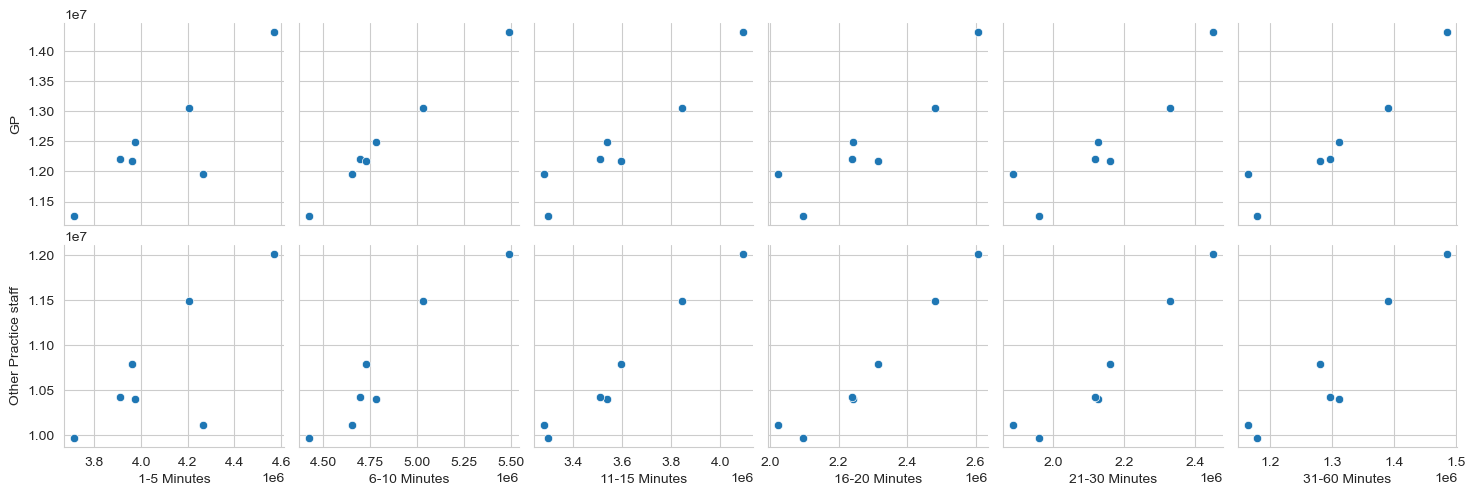

In [144]:
# Create a pairplot to check for any relationship between HCP type and appointment duration. 
sns.pairplot(ad_ar_merge,
             y_vars=['GP', 'Other Practice staff'],
             x_vars=['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes'])

# Results do not show any obvious unsual trends. 
# More data needed on HCP type by appointment duration. 